In [1]:
### 1. test ellipse angle, distance

In [1]:
import sys
sys.path.append("../../")
import os

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager
from scipy import stats

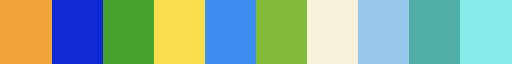

In [3]:
colors = [(241, 165, 58), (15, 42, 212),(74, 162, 46),(249, 222, 75),(63, 142, 239),(128, 186, 56),(247, 240, 220),(151, 200, 233),(79, 174, 167),(135, 235, 233)]
colors_gaudi=[]
for a,b,c in colors:
    colors_gaudi.append((a/255,b/255,c/255))
colors_gaudi_16 = ['#f1a53', '#0f2ad4', '#4aa22e', '#f9de4b', '#3f8ef0',
                     '#80ba38', '#f7f0dc', '#97c8e9', '#4faea7', '#87ebe9']
COLOR_Gaudi = mpl.colors.ListedColormap(colors_gaudi)
COLOR_Gaudi

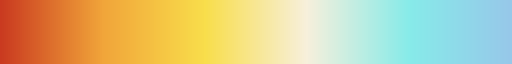

In [4]:
colors_list = [(202, 58, 32),(241, 165, 58), (249, 222, 75),(247, 240, 220), (135, 235, 233),(151, 200, 233),]
colors_gaudi_list=[]
for a,b,c in colors_list:
    colors_gaudi_list.append((a/255,b/255,c/255))
COLOR_Gaudi_line = mpl.colors.LinearSegmentedColormap.from_list("", colors_gaudi_list)
COLOR_Gaudi_line

In [5]:
color_red = np.array([202, 58, 32])/255
color_green = np.array([128, 186, 56])/255

In [6]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 12,
       'serif': ['Arial', 'Computer Modern Sans Serif', 'DejaVu Sans',]}
axes = {'edgecolor': 'black',
        'linewidth': '1',
       'facecolor': 'white'}
mpl.rc('font', **font)
mpl.rc('axes', **axes)
#axes.edgecolor:     black   # axes edge color
#axes.linewidth:     0.8     # edge line width

#### 1. trend

In [5]:
data_timepoint= pd.read_csv("./csv/ecc_trend_1_table.csv")

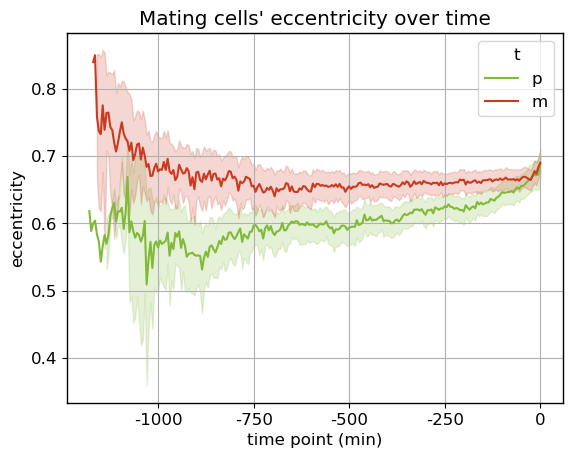

In [34]:
x_range = np.arange(-200, 50, 50)
x_range_label = x_range*5

sns.lineplot(data_timepoint, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95),
            palette=[color_green, color_red])
             # hue="region", style="event",
             # data=fmri)
plt.ylabel("eccentricity")
plt.xticks(x_range, x_range_label)
plt.title("Mating cells' eccentricity over time")
plt.xlabel("time point (min)")
plt.grid()
plt.savefig("./figs/ecc_trend_1.svg")
plt.show()

In [47]:
data_timepoint_area = pd.read_csv("./csv/area_trend_table.csv", index_col=0)

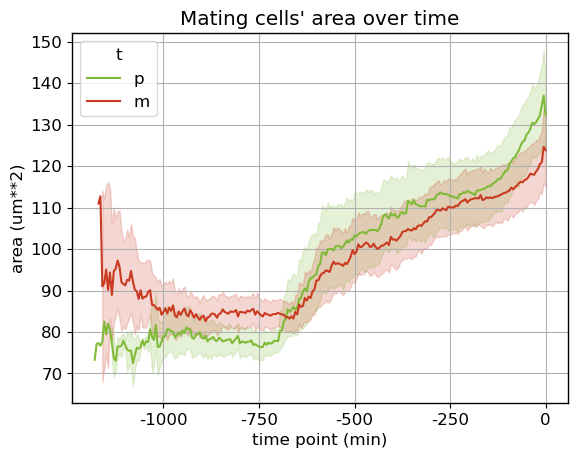

In [51]:
sns.lineplot(data_timepoint_area, x="timepoint", y="values", hue="t", estimator='mean', errorbar=('ci', 95),
            palette=[color_green, color_red])
             # hue="region", style="event",
             # data=fmri)
plt.ylabel("area (um**2)")
plt.xticks(x_range, x_range_label)
plt.title("Mating cells' area over time")
plt.xlabel("time point (min)")
plt.grid()
plt.savefig("./figs/area_trend_1.svg")
plt.show()

In [54]:
data_timepoint_angle = pd.read_csv("./csv/angle_trend_table.csv", index_col=0)

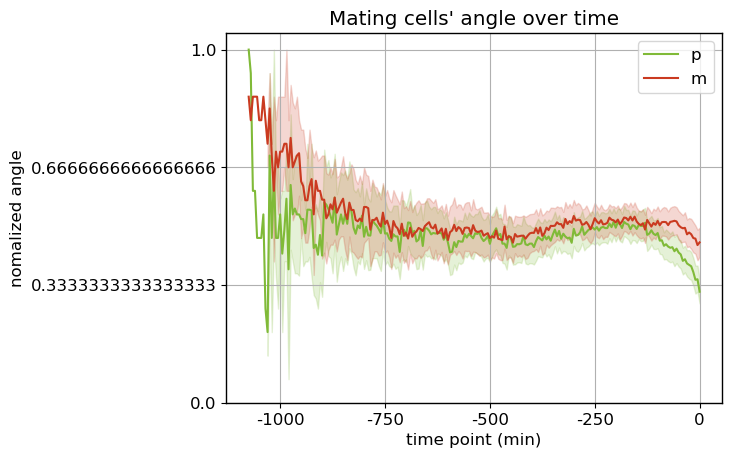

In [80]:
y_range = np.arange(0, 20, 5)
y_range_label = y_range/15

sns.lineplot(data_timepoint_angle, x="timepoint", y="angle_index_p", estimator='mean', errorbar=('ci', 95),label='p',c=color_green)
             # hue="region", style="event",
             # data=fmri)
sns.lineplot(data_timepoint_angle, x="timepoint", y="angle_index_m", estimator='mean', errorbar=('ci', 95),label='m',c=color_red)
             # hue="region", style="event",
             # data=fmri)
plt.legend()
plt.ylabel("nomalized angle")
plt.yticks(y_range, y_range_label)

plt.xticks(x_range, x_range_label)
plt.title("Mating cells' angle over time")
plt.xlabel("time point (min)")
plt.grid()
plt.savefig("./figs/angle_trend_1.svg")
plt.show()

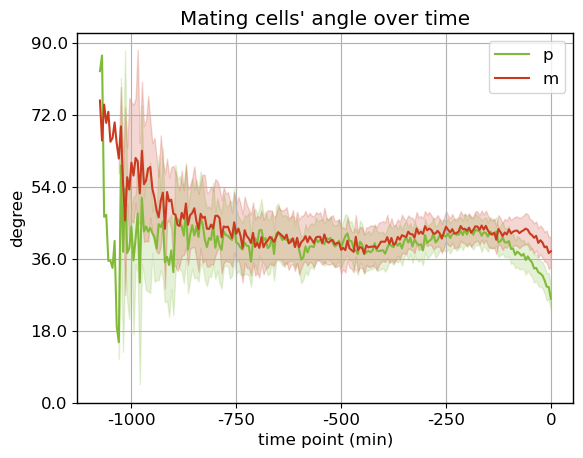

In [83]:
y_range = np.arange(0, np.pi*11/20, np.pi/10)
y_range_label = y_range*180/np.pi

sns.lineplot(data_timepoint_angle, x="timepoint", y="angle_p", estimator='mean', errorbar=('ci', 95),label='p',c=color_green)
             # hue="region", style="event",
             # data=fmri)
sns.lineplot(data_timepoint_angle, x="timepoint", y="angle_m", estimator='mean', errorbar=('ci', 95),label='m',c=color_red)
             # hue="region", style="event",
             # data=fmri)
plt.legend()
plt.ylabel("degree")
plt.yticks(y_range, y_range_label)

plt.xticks(x_range, x_range_label)
plt.title("Mating cells' angle over time")
plt.xlabel("time point (min)")
plt.grid()
plt.savefig("./figs/angle_degree_trend_1.svg")
plt.show()

In [7]:
pathname = "./all_time_new22.obj"
all_time = pd.read_pickle(pathname)

In [16]:
(~all_time["-0"].flag).sum()

856

In [85]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)

In [106]:
all_obj

p   m  p_type  m_type  p_start  p_area     p_axis  p_eccentricity  \
0     57  59       1       2     -101   528.0  29.153932        0.605044   
1     18  59       1       2     -118   655.0  34.275588        0.699259   
2     23  59       1       2     -118   724.0  37.881296        0.762872   
3     51  59       1       2     -107   514.0  27.625651        0.500365   
4     52  59       1       2     -107   514.0  26.074276        0.253260   
...   ..  ..     ...     ...      ...     ...        ...             ...   
1302  19  14       1       2     -118  1438.0  50.305300        0.684300   
1303   5  10       1       2     -127  1410.0  57.110033        0.833260   
1304   7  10       1       2     -127  1567.0  57.239349        0.789772   
1305  19  10       1       2     -118  1438.0  50.305300        0.684300   
1306  20  10       1       2     -118  1778.0  63.151652        0.820191   

      m_start  m_area  ...  m_angle_index  center_dist  nearest_dist   flag  \
0        -100   333.0  ...             52    28.781290      4.244761   True   
1        -100   333.0  ...             29    43.920034     15.387797  False   
2        -100   333.0  ...             41    26.891361      2.008671  False   
3        -100   333.0  ...              0    43.163887     16.316146  False   
4        -100   333.0  ...             58    46.704651     21.220622  False   
...       ...     ...  ...            ...          ...           ...    ...   
1302     -127  1318.0  ...             33    56.068366      9.250857  False   
1303     -127  1202.0  ...             56    44.330032      2.961589  False   
1304     -127  1202.0  ...              7    47.869759      1.597449  False   
1305     -127  1202.0  ...             19    39.737580      4.006710   True   
1306     -127  1202.0  ...             29    68.679714     21.220302  False   

      time_measure  time_0  ref  \
0               18     118   57   
1               18     118   59   
2               18     118   59   
3               18     118   59   
4               18     118   59   
...            ...     ...  ...   
1302             9     127   19   
1303             9     127   10   
1304             9     127   10   
1305             9     127   10   
1306             9     127   10   

                                                  image  p_angle_index_norm  \
0     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...                   5   
1     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...                   8   
2     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...                   6   
3     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...                   1   
4     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...                   1   
...                                                 ...                 ...   
1302       20230315_h90_hpm_03_08_R3D._rigid_004003.tif                   8   
1303       20230315_h90_hpm_03_08_R3D._rigid_004003.tif                   7   
1304       20230315_h90_hpm_03_08_R3D._rigid_004003.tif                   4   
1305       20230315_h90_hpm_03_08_R3D._rigid_004003.tif                  14   
1306       20230315_h90_hpm_03_08_R3D._rigid_004003.tif                   7   

      m_angle_index_norm  
0                      8  
1                      1  
2                     11  
3                      0  
4                      2  
...                  ...  
1302                   3  
1303                   4  
1304                   7  
1305                  11  
1306                   1  

[1307 rows x 27 columns]

In [159]:
# all_obj = pd.concat([all_time['start_m'],all_time['start_p']])
all_obj = all_time['-0']
all_obj = all_obj.reset_index(drop=True)
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    return data
all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
all_obj = all_obj[['p','m','p_angle','m_angle','p_angle_index_norm', 'm_angle_index_norm', 'flag','image']]
all_obj = all_obj.drop_duplicates()

In [191]:
data = all_obj[all_obj.flag].copy()
data.loc[data['p_angle_index_norm']<5, 'p_type']='tip'
data.loc[(data['p_angle_index_norm']>=5) & (data['p_angle_index_norm']<10), 'p_type']='middle'
data.loc[data['p_angle_index_norm']>=10, 'p_type']='side'

data.loc[data['m_angle_index_norm']<5, 'm_type']='tip'
data.loc[(data['m_angle_index_norm']>=5) & (data['m_angle_index_norm']<10), 'm_type']='middle'
data.loc[data['m_angle_index_norm']>=10, 'm_type']='side'

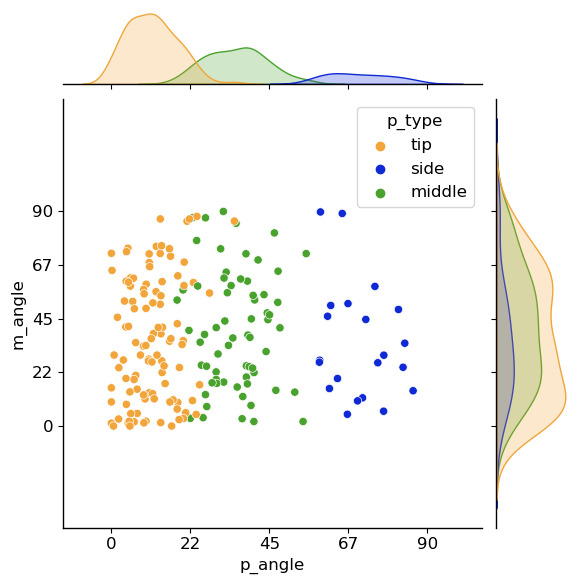

In [198]:
x_range = np.linspace(0,np.pi/2,5, dtype=np.float_)
x_range_label = (x_range*180/np.pi).astype(np.int_)
sns.jointplot(data, x='p_angle', y='m_angle', hue='p_type',palette=colors_gaudi[0:3],alpha=1)
plt.xticks(x_range, x_range_label)
plt.yticks(x_range, x_range_label)
plt.savefig("./figs/p_cell_angle_.svg")
plt.show()

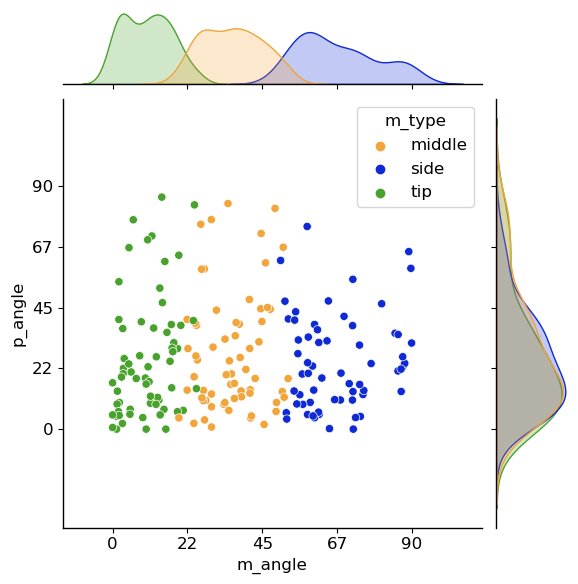

In [200]:
x_range = np.linspace(0,np.pi/2,5, dtype=np.float_)
x_range_label = (x_range*180/np.pi).astype(np.int_)
sns.jointplot(data, x='m_angle', y='p_angle', hue='m_type',palette=colors_gaudi[0:3],alpha=1)
plt.xticks(x_range, x_range_label)
plt.yticks(x_range, x_range_label)
plt.savefig("./figs/m_cell_angle_.svg")
plt.show()

/tmp/ipykernel_3937/1079619626.py:3: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  g = sns.swarmplot(data, x='p_type', y='m_angle',  hue='p_type', hue_order=['tip','middle','side'], palette=colors_gaudi)


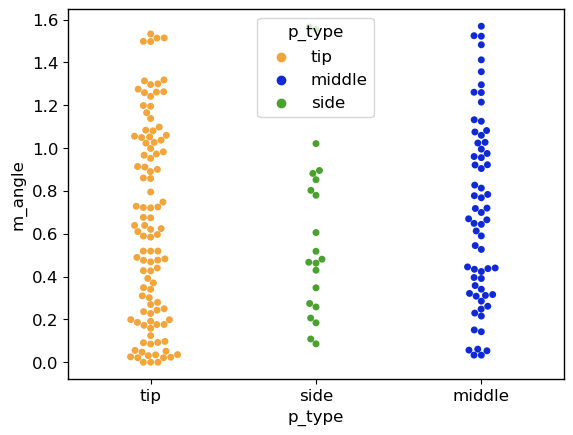

In [182]:
g = sns.swarmplot(data, x='p_type', y='m_angle',  hue='p_type', hue_order=['tip','middle','side'], palette=colors_gaudi)
# plt.xticks(x_range, x_range_label)
plt.show()

/tmp/ipykernel_3937/2610206922.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.swarmplot(data, x='m_type', y='p_angle',  hue='m_type', hue_order=['tip','middle','side'], palette=colors_gaudi)


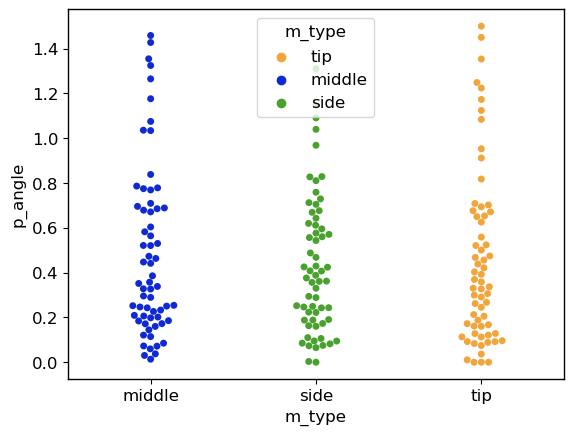

In [164]:
sns.swarmplot(data, x='m_type', y='p_angle',  hue='m_type', hue_order=['tip','middle','side'], palette=colors_gaudi)
plt.show()

In [296]:
all_obj = pd.concat([all_time['start_m'],all_time['start_p']])
# all_obj = all_time['-12']
all_obj = all_obj.reset_index(drop=True)
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    return data
all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
all_obj = all_obj[['p','m','p_angle','m_angle','p_angle_index_norm', 'm_angle_index_norm', 'flag','image']]
all_obj = all_obj.drop_duplicates()

data = all_obj[all_obj.flag].copy()
data.loc[data['p_angle_index_norm']<5, 'p_type']='tip'
data.loc[(data['p_angle_index_norm']>=5) & (data['p_angle_index_norm']<10), 'p_type']='middle'
data.loc[data['p_angle_index_norm']>=10, 'p_type']='side'

data.loc[data['m_angle_index_norm']<5, 'm_type']='tip'
data.loc[(data['m_angle_index_norm']>=5) & (data['m_angle_index_norm']<10), 'm_type']='middle'
data.loc[data['m_angle_index_norm']>=10, 'm_type']='side'

x_range = np.linspace(0,np.pi/2,5, dtype=np.float_)
x_range_label = (x_range*180/np.pi).astype(np.int_)

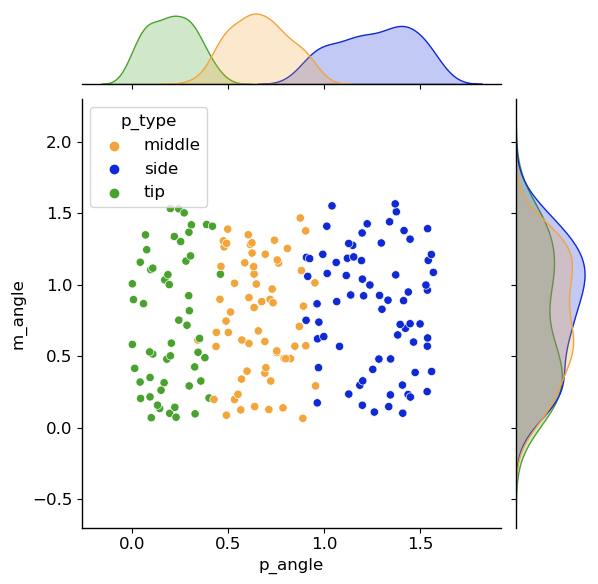

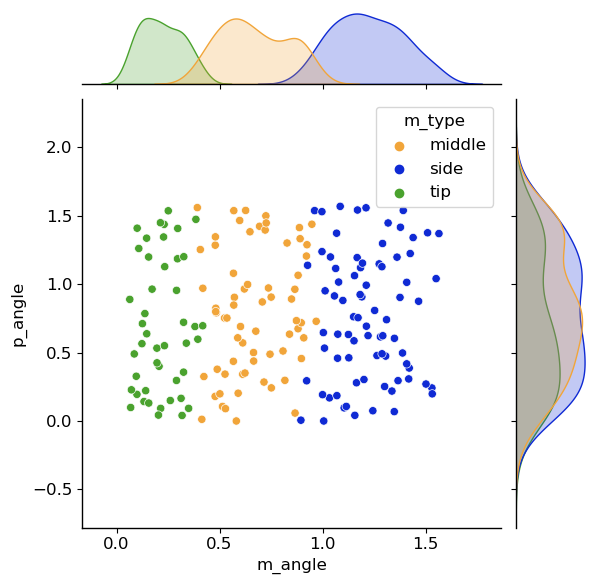

In [299]:
sns.jointplot(data, x='p_angle', y='m_angle', hue='p_type',palette=colors_gaudi[0:3],alpha=1)
plt.savefig("./figs/angle_start_p.svg")
sns.jointplot(data, x='m_angle', y='p_angle', hue='m_type',palette=colors_gaudi[0:3],alpha=1)
plt.savefig("./figs/angle_start_m.svg")
plt.show()

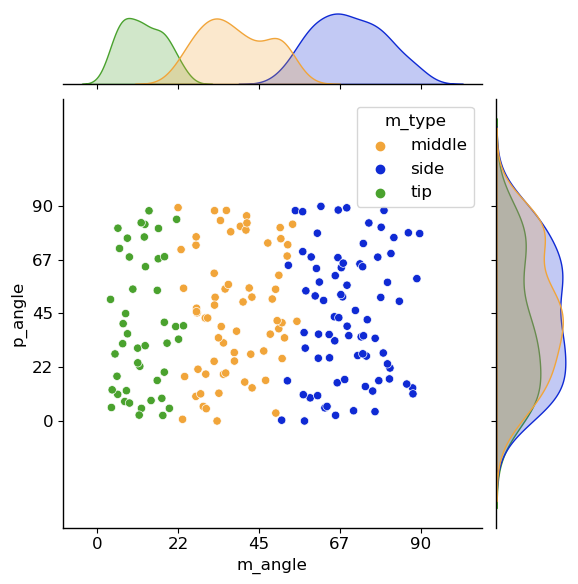

In [209]:
x_range = np.linspace(0,np.pi/2,5, dtype=np.float_)
x_range_label = (x_range*180/np.pi).astype(np.int_)
sns.jointplot(data, x='m_angle', y='p_angle', hue='m_type',palette=colors_gaudi[0:3],alpha=1)
plt.xticks(x_range, x_range_label)
plt.yticks(x_range, x_range_label)
# plt.savefig("./figs/p_cell_angle_start.svg")
plt.show()

### number of neibor

In [ ]:
number_of_neibor = []
mated = data_table[data_table.flag]
for i in range(0, mated.shape[0]):
    p = mated.iloc[i].p
    m = mated.iloc[i].m
    image_id = mated.iloc[i].image_id
    number_p = data_table.loc[(data_table.image_id == image_id) & (data_table.p == p)].m.count()
    number_m = data_table.loc[(data_table.image_id == image_id) & (data_table.m == m)].p.count()
    number_of_neibor.append([image_id, number_p, number_m])

In [346]:
# all_obj = all_time['-0']
all_obj = pd.concat([all_time['start_m'],all_time['start_p']])
data = all_obj[['p','m','image']].copy()
# "for i in range(0, data.shape[0]):
nei_data = pd.DataFrame()
img = data.image.unique()
for i in range(0, len(img)):
    tmp = data[data.image==img[i]]
    n_p = len(tmp.p.unique())
    n_m = len(tmp.m.unique())
    nei_data.loc[i, ['name', 'p', 'm']] = [img[i], n_p, n_m]
number_p = nei_data['p'].value_counts()
number_m = nei_data['m'].value_counts()

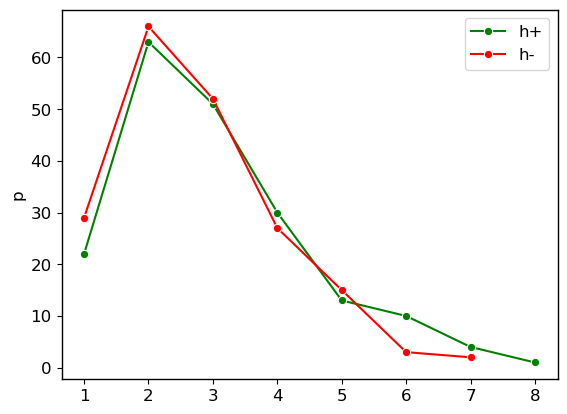

In [349]:
sns.lineplot(number_p, marker="o", label = "h+", c="green")
sns.lineplot(number_m, marker="o", label = "h-", c="red")
plt.savefig("./figs/number_of_neiber.svg")

In [352]:
all_obj.keys()

Index(['p', 'm', 'p_type', 'm_type', 'p_start', 'p_area', 'p_axis',
       'p_eccentricity', 'm_start', 'm_area', 'm_axis', 'm_eccentricity',
       'neighbor_m', 'neighbor_p', 'p_angle', 'm_angle', 'p_angle_index',
       'm_angle_index', 'center_dist', 'nearest_dist', 'flag', 'time_measure',
       'time_0', 'ref', 'image'],
      dtype='object')

index   p   m  p_type  m_type  p_start  p_area     p_axis  \
0         0  57  59       1       2     -101   528.0  29.153932   
1         1  18  59       1       2     -118   655.0  34.275588   
2         2  23  59       1       2     -118   724.0  37.881296   
3         3  51  59       1       2     -107   514.0  27.625651   
4         4  52  59       1       2     -107   514.0  26.074276   
...     ...  ..  ..     ...     ...      ...     ...        ...   
1302      1  19  14       1       2     -118  1438.0  50.305300   
1303      2   5  10       1       2     -127  1410.0  57.110033   
1304      3   7  10       1       2     -127  1567.0  57.239349   
1305      4  19  10       1       2     -118  1438.0  50.305300   
1306      5  20  10       1       2     -118  1778.0  63.151652   

      p_eccentricity  m_start  ...  nearest_dist   flag  time_measure  time_0  \
0           0.605044     -100  ...      4.244761   True            18     118   
1           0.699259     -100  ...     15.387797  False            18     118   
2           0.762872     -100  ...      2.008671  False            18     118   
3           0.500365     -100  ...     16.316146  False            18     118   
4           0.253260     -100  ...     21.220622  False            18     118   
...              ...      ...  ...           ...    ...           ...     ...   
1302        0.684300     -127  ...      9.250857  False             9     127   
1303        0.833260     -127  ...      2.961589  False             9     127   
1304        0.789772     -127  ...      1.597449  False             9     127   
1305        0.684300     -127  ...      4.006710   True             9     127   
1306        0.820191     -127  ...     21.220302  False             9     127   

      ref                                              image  center_norm  \
0      57  20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...     0.032364   
1      59  20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...     0.291603   
2      59  20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...     0.000000   
3      59  20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...     0.278654   
4      59  20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...     0.339287   
...   ...                                                ...          ...   
1302   19       20230315_h90_hpm_03_08_R3D._rigid_004003.tif     0.291603   
1303   10       20230315_h90_hpm_03_08_R3D._rigid_004003.tif     0.000000   
1304   10       20230315_h90_hpm_03_08_R3D._rigid_004003.tif     0.278654   
1305   10       20230315_h90_hpm_03_08_R3D._rigid_004003.tif     0.339287   
1306   10       20230315_h90_hpm_03_08_R3D._rigid_004003.tif     1.000000   

      center_order  near_norm  near_order  
0         0.428571   0.038540    0.428571  
1         0.142857   0.230597    0.142857  
2         1.000000   0.000000    1.000000  
3         0.571429   0.246597    0.285714  
4         0.285714   0.331129    0.571429  
...            ...        ...         ...  
1302      0.142857   0.230597    0.142857  
1303      1.000000   0.000000    1.000000  
1304      0.571429   0.246597    0.285714  
1305      0.285714   0.331129    0.571429  
1306      0.714286   1.000000    0.714286  

[1307 rows x 30 columns]

In [403]:
from cellmating.resolution import find_key, DIC_RESOLUTION
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [408]:
k = find_key(names[i])

In [410]:
k[1]

{'reso': 0.1944, 'bin': 3}

In [521]:
data_table = pd.concat([all_time['start_m'],all_time['start_p']])
data_table = data_table.reset_index()
names = all_obj.image.unique()
for i in range(0, len(names)):
    group = data_table[data_table.image == names[i]]
    center_order = (group.center_dist - group.center_dist.min()) / (group.center_dist.max() - group.center_dist.min())
    near_order = (group.nearest_dist - group.nearest_dist.min()) / (group.nearest_dist.max() - group.nearest_dist.min())
    
    k = find_key(names[i])
    if k is None:
        v = {'reso': 0.12960, 'bin': 2}
    else:
        v = k[1]
    data_table.loc[group.index, 'nearest_dist'] = data_table.loc[group.index, 'nearest_dist']*v['reso']*v['bin']
    data_table.loc[group.index, 'center_dist'] = data_table.loc[group.index, 'center_dist']*v['reso']*v['bin']
    
    data_table.loc[group.index, 'center_norm'] = center_order
    data_table.loc[group.index, 'center_order'] = (np.argsort(center_order)+1) / len(center_order)
    data_table.loc[group.index, 'near_norm'] = near_order
    data_table.loc[group.index, 'near_order'] = (np.argsort(near_order)+1) / len(near_order)

distance = data_table[["image","nearest_dist","center_dist","near_norm", "center_norm", "center_order","near_order","flag"]].copy()

distance.loc[distance.center_order<1/3,'order_label'] = '1/3'
distance.loc[(distance.center_order>=1/3) & (distance.near_order<2/3),'order_label'] = '2/3'
distance.loc[distance.center_order>=2/3,'order_label'] = '3/3'

distance = distance[distance.nearest_dist < 20]
index = list(set(distance[~distance.flag].sample(400).index).union(set(distance[distance.flag].index)))
distance = distance.loc[index]
distance.flag = distance.flag.map({True:"mated",False:"non-mathed"})

In [ ]:
distance

/tmp/ipykernel_3937/2834615886.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(data, x='nearest_dist', y='center_dist', hue='flag',size='order_label',palette=colors_gaudi)


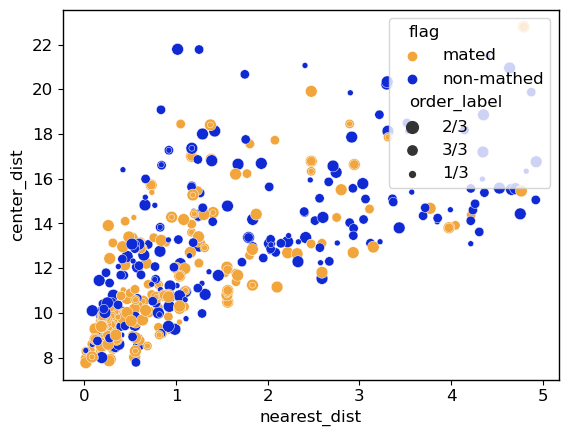

In [532]:
data = distance[distance.nearest_dist < 5]
sns.scatterplot(data, x='nearest_dist', y='center_dist', hue='flag',size='order_label',palette=colors_gaudi)
# plt.savefig("/media/wd/T7/data/mating_all/figs/distance_vs_order.png")
plt.savefig("./figs/distance_less5.svg")
plt.show()

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


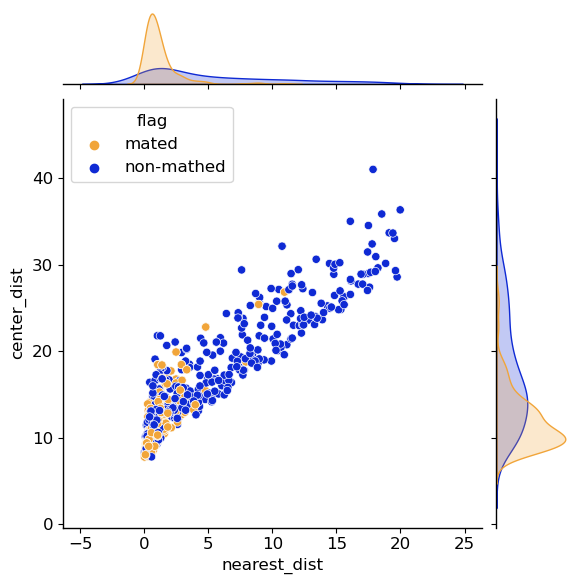

In [524]:
data = distance
sns.jointplot(data, x='nearest_dist', y='center_dist', hue="flag",palette=colors_gaudi )
plt.savefig("./figs/distance_all.svg")

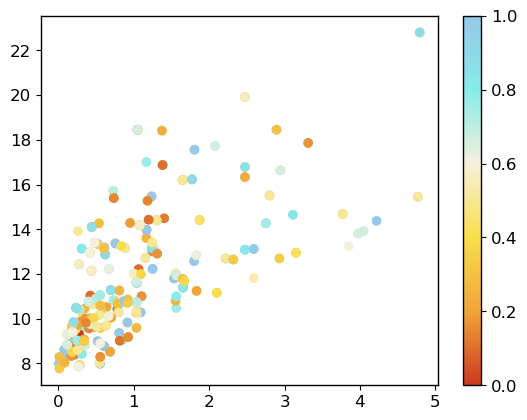

In [542]:
data = data[data.flag=='mated']
plt.scatter(x=data['nearest_dist'], y=data['center_dist'],c=data['center_order'],cmap=COLOR_Gaudi_line)
plt.colorbar()
plt.savefig("./figs/distance_mated_less5.svg")


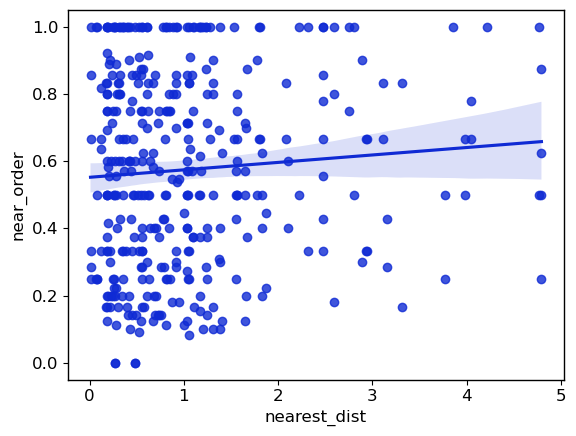

In [541]:
sns.regplot(data, x='nearest_dist', y='near_order', color=colors_gaudi[1])
plt.savefig("figs/distance_order.svg")

Text(0.5, 1.0, 'anlge t=None')

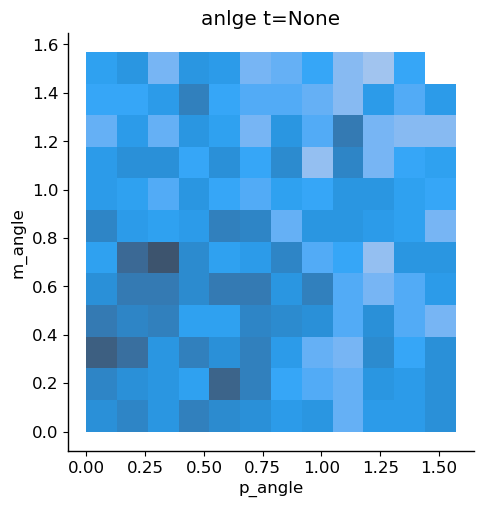

In [543]:
sns.displot(x=all_obj.p_angle, y=all_obj.m_angle)
plt.title(f"anlge t={k}")
# plt.savefig('index_pairs_'+k+'.svg')

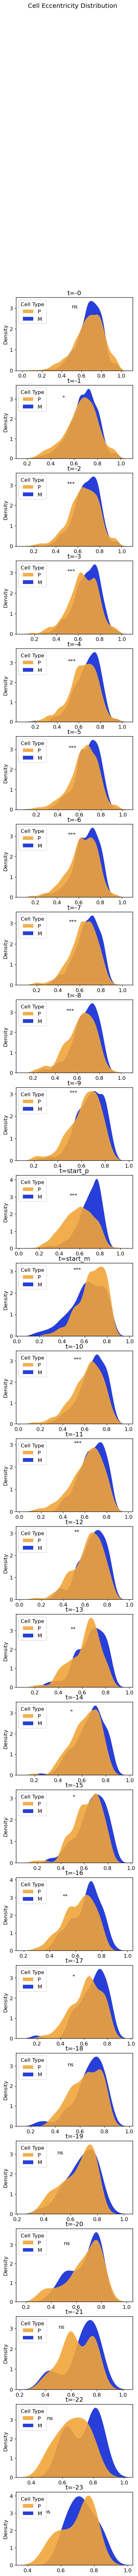

In [65]:
length = len(all_time.keys())
fig, axs = plt.subplots(length,1,figsize=(4*1.2, 3*1.2*length))
for i, k in enumerate(all_time.keys()):
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    if all_obj.shape[0]>0:
        data_p = all_obj[['p','p_eccentricity', 'image']].drop_duplicates()
        data_m = all_obj[['m','m_eccentricity', 'image']].drop_duplicates()
        g = sns.kdeplot(
           [data_p.p_eccentricity.rename("P"), data_m.m_eccentricity.rename("M")],
           fill=True, common_norm=False, palette=colors_gaudi[:2],
           alpha=0.9, linewidth=0,bw_adjust=0.8, ax=axs[i]
        )
        s,p = stats.ttest_ind(data_p.p_eccentricity, data_m.m_eccentricity)
        if p > 0.05:
            axs[i].text(0.5, 3, "ns")
        elif p > 0.01:
            axs[i].text(0.5, 3, "*")
        elif p > 0.001:
            axs[i].text(0.5, 3, "**")
        else:
            axs[i].text(0.5, 3, "***")
        sns.move_legend(g, "upper left", title='Cell Type')
        axs[i].set_title(f"t={k}")
        # plt.legend(loc='upper left')
fig.suptitle("Cell Eccentricity Distribution")
plt.savefig('Cell_Eccentricity_Distribution_'+k+'.svg')
plt.show()

/tmp/ipykernel_4545/415399124.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  g = sns.kdeplot(
/tmp/ipykernel_4545/415399124.py:15: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  s,p = stats.ttest_ind(data_p.p_eccentricity, data_m.m_eccentricity)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


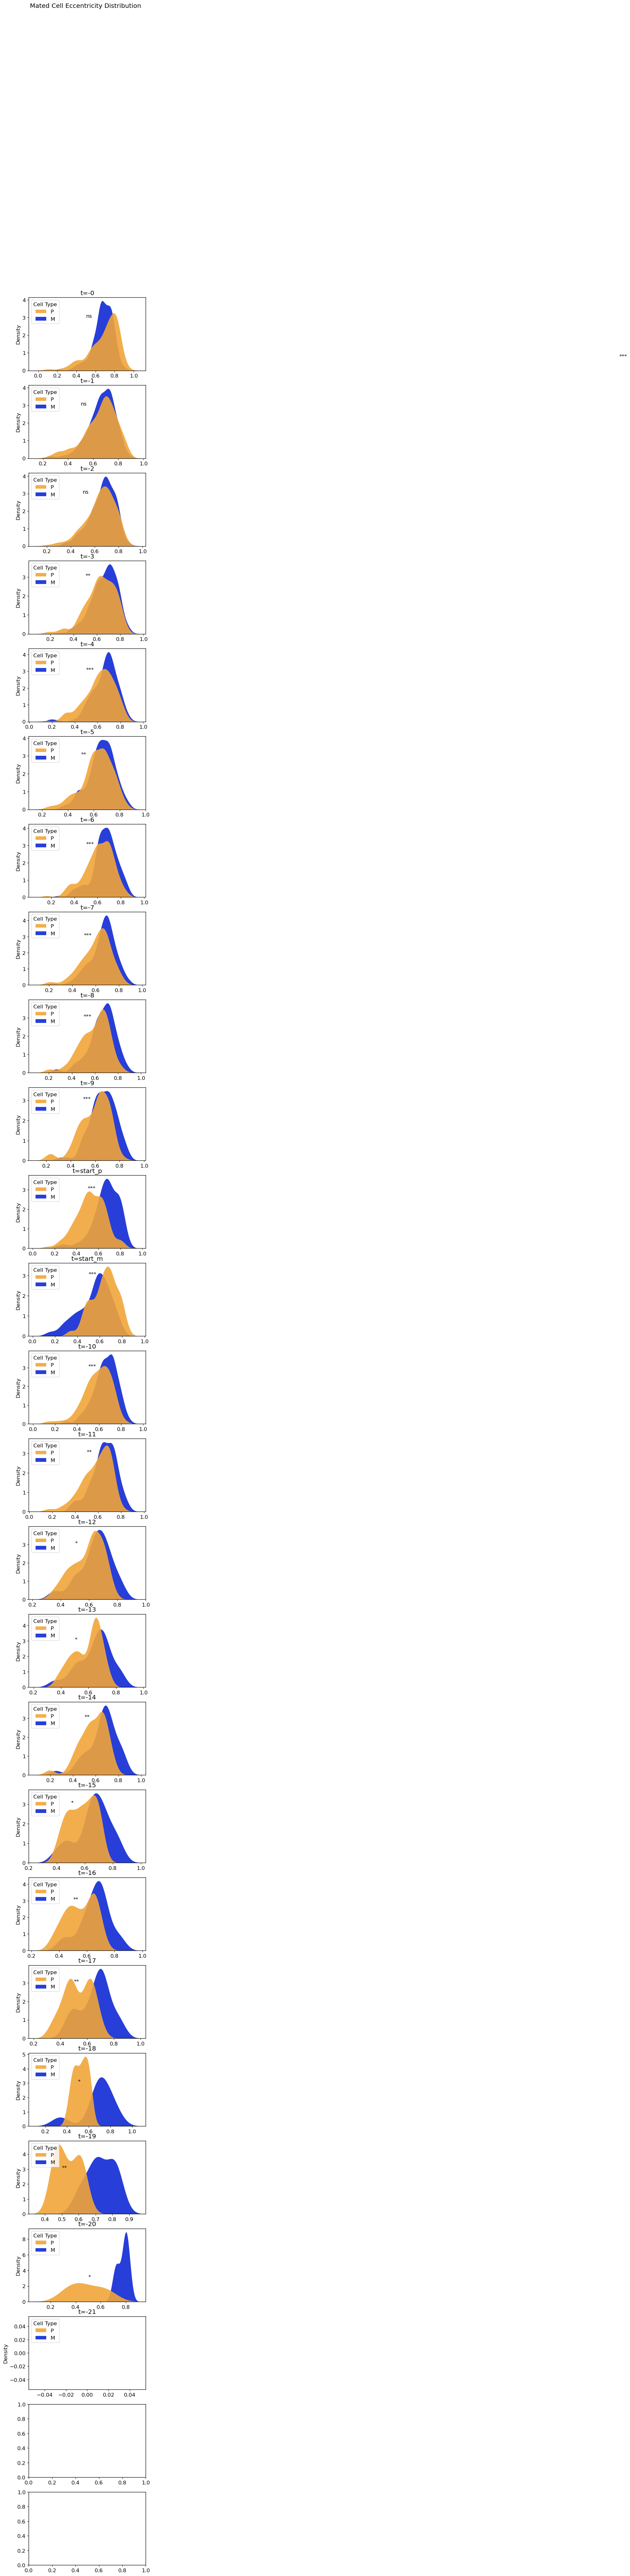

In [67]:
length = len(all_time.keys())
fig, axs = plt.subplots(length,1,figsize=(4*1.2, 3*1.2*length))
for i, k in enumerate(all_time.keys()):
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    all_obj = all_obj[all_obj.flag]
    if all_obj.shape[0]>0:
        data_p = all_obj[['p','p_eccentricity', 'image']].drop_duplicates()
        data_m = all_obj[['m','m_eccentricity', 'image']].drop_duplicates()
        g = sns.kdeplot(
           [data_p.p_eccentricity.rename("P"), data_m.m_eccentricity.rename("M")],
           fill=True, common_norm=False, palette=colors_gaudi[:2],
           alpha=0.9, linewidth=0,bw_adjust=0.8, ax=axs[i]
        )
        s,p = stats.ttest_ind(data_p.p_eccentricity, data_m.m_eccentricity)
        if p > 0.05:
            axs[i].text(0.5, 3, "ns")
        elif p > 0.01:
            axs[i].text(0.5, 3, "*")
        elif p > 0.001:
            axs[i].text(0.5, 3, "**")
        else:
            axs[i].text(0.5, 3, "***")
        sns.move_legend(g, "upper left", title='Cell Type')
        axs[i].set_title(f"t={k}")
        # plt.legend(loc='upper left')
fig.suptitle("Mated Cell Eccentricity Distribution")
plt.savefig('mated_Cell_Eccentricity_Distribution_'+k+'.svg')
plt.show()

In [604]:
all_obj = pd.concat([all_time["start_p"],all_time["start_m"]])
all_obj = all_obj.reset_index(drop=True)
# all_obj = all_time['-0']
data = all_obj[['p','m','p_start','m_start','flag','image']]
data = data.drop_duplicates()

index = list(set(data[~data.flag].sample(300).index).union(set(data[data.flag].index)))
data = data.loc[index]

In [601]:
a = data[data.flag].p_start - data[data.flag].m_start
b = data[~data.flag].p_start - data[~data.flag].m_start
s,p = stats.ttest_ind(data.p_start, data.m_start)
print(s, p)

2.643224826978582 0.008340231913463975


In [605]:
s,p = stats.ttest_ind(data[data.flag].p_start, data[data.flag].m_start)
print(s, p)

1.7760938000395885 0.07647378018186347


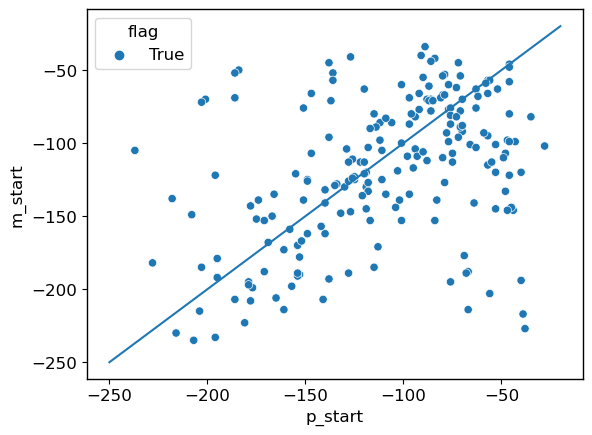

In [607]:
sns.scatterplot(data[data.flag], x='p_start', y='m_start', hue='flag')

plt.plot([-250,-20],[-250,-20])

6.665338645418327

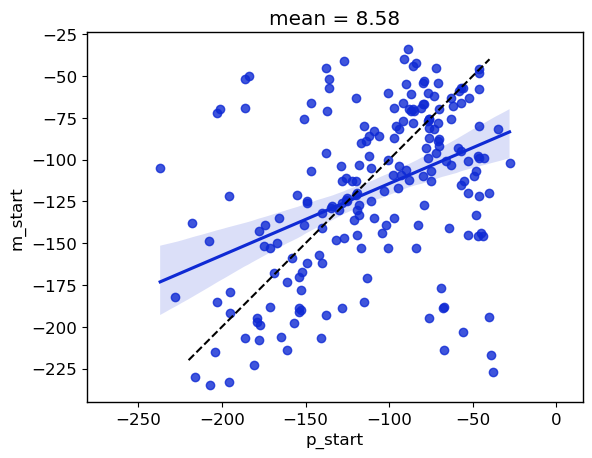

In [659]:
mated = data[data.flag]
# sns.scatterplot(mated, x='p_start',y='m_start',hue='flag',palette=colors_gaudi)
sns.regplot(mated, x='p_start', y='m_start', color=colors_gaudi[1],ci=95, line_kws=dict(color=colors_gaudi[1]),)

plt.plot([-220,-40],[-220,-40],'--',c='black',)
plt.title(f'mean = {np.mean(mated.p_start - mated.m_start):0.3}')
plt.axis('equal')
plt.savefig("./figs/fusion_time_m_first.svg")

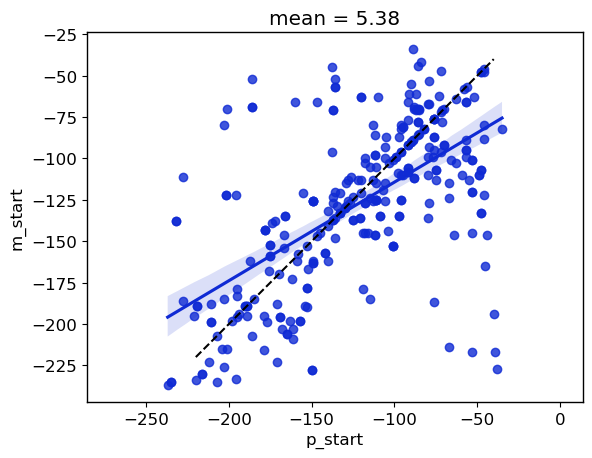

In [660]:
mated = data[~data.flag]
# sns.scatterplot(mated, x='p_start',y='m_start',hue='flag',palette=colors_gaudi)
sns.regplot(mated, x='p_start', y='m_start', color=colors_gaudi[1],ci=95, line_kws=dict(color=colors_gaudi[1]),)

plt.plot([-220,-40],[-220,-40],'--',c='black',)
plt.title(f'mean = {np.mean(mated.p_start - mated.m_start):0.3}')
plt.axis('equal')
plt.savefig("./figs/no_fusion_time_m_first.svg")

In [699]:
all_obj

p   m  p_type  m_type  p_start  p_area     p_axis  p_eccentricity  \
0     57  28       1       2     -101   619.0  35.867525        0.776547   
1     57  59       1       2     -101   619.0  35.867525        0.776547   
2     23  59       1       2     -118   760.0  39.528561        0.783037   
3     51  59       1       2     -107   544.0  27.946717        0.454279   
4     52  59       1       2     -107   486.0  26.893912        0.514029   
...   ..  ..     ...     ...      ...     ...        ...             ...   
1225  19  10       1       2     -118  1754.0  69.459717        0.877205   
1226   5  10       1       2     -127  1628.0  60.154919        0.815060   
1227   7  10       1       2     -127  1796.0  60.496434        0.778493   
1228  19  10       1       2     -118  1754.0  69.459717        0.877205   
1229  27  10       1       2      -45  4310.0  94.811169        0.719860   

      m_start  m_area  ...  p_angle_index  m_angle_index  center_dist  \
0        -118   887.0  ...             21             18    59.252799   
1        -100   500.0  ...              3             53    31.810915   
2        -100   500.0  ...              1             45    33.076115   
3        -100   500.0  ...             31              4    33.901114   
4        -100   500.0  ...             32             59    40.221602   
...       ...     ...  ...            ...            ...          ...   
1225     -127  1117.0  ...             53             15    51.523168   
1226     -127  1117.0  ...             57              4    50.319042   
1227     -127  1117.0  ...             57             10    72.758545   
1228     -127  1117.0  ...             53             15    51.523168   
1229     -127  1117.0  ...              3             25    72.077715   

      nearest_dist   flag  time_measure  time_0  ref  \
0        32.823224  False           117     118   57   
1         0.735164   True           117     118   57   
2         2.761008  False           117     118   59   
3         6.030119  False           117     118   59   
4        12.745751  False           117     118   59   
...            ...    ...           ...     ...  ...   
1225      6.298353   True           126     127   19   
1226      2.979767  False           126     127   10   
1227     24.804708  False           126     127   10   
1228      6.298353   True           126     127   10   
1229      4.450931  False           126     127   10   

                                                  image  ref_type  
0     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         p  
1     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         p  
2     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         m  
3     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         m  
4     20220802_YAV2104xYAV2105_001_01_R3D_REF_rigid_...         m  
...                                                 ...       ...  
1225       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         p  
1226       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  
1227       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  
1228       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  
1229       20230315_h90_hpm_03_08_R3D._rigid_004003.tif         m  

[1230 rows x 26 columns]

In [820]:
all_obj = pd.concat([all_time["start_p"],all_time["start_m"],all_time["-0"],all_time["-1"],all_time["-2"]])
# all_obj = all_time['-0']
all_obj = all_obj.reset_index(drop=True)

all_obj.loc[all_obj.ref == all_obj.p, 'ref_type'] = 'p'
all_obj.loc[all_obj.ref == all_obj.m, 'ref_type'] = 'm'
# all_obj = all_time['-0']
data = all_obj[['p','m','neighbor_p','neighbor_m','flag','ref_type','image']]
data = data.drop_duplicates()

# index = list(set(data[~data.flag].sample(300).index).union(set(data[data.flag].index)))
# data = data.loc[index]
# data = data.drop_duplicates()

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1826: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1877: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:1883: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


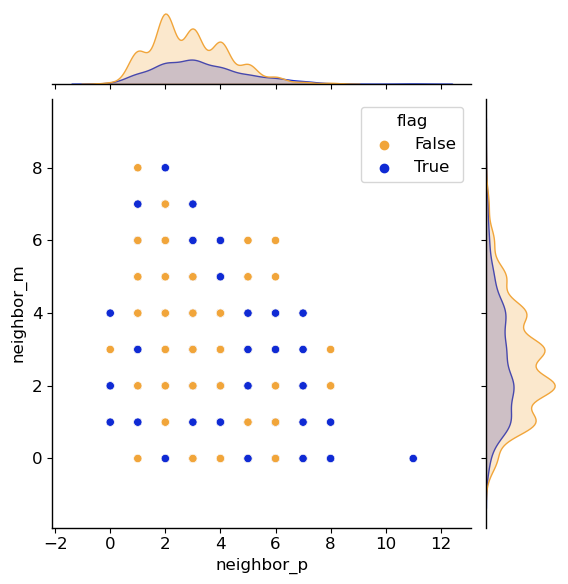

In [821]:
sns.jointplot(data[data.ref_type=='p'], x='neighbor_p', y='neighbor_m', hue="flag", palette=colors_gaudi )

1.3505703822514157e-05


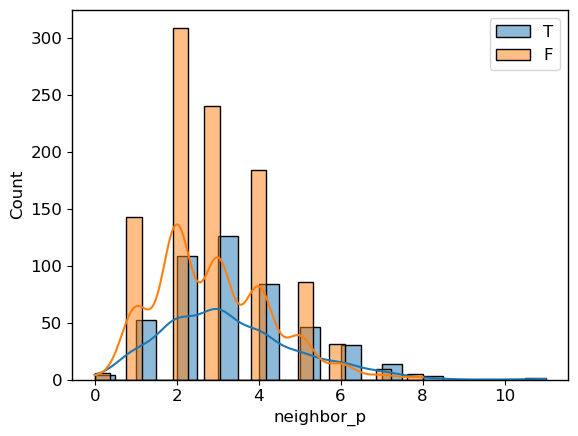

In [830]:
data_1 = data[(data.ref_type == 'p')]
a = data_1[data_1.flag].neighbor_p
b = data_1[~data_1.flag].neighbor_p
sns.histplot(a, label="T", kde=True)
sns.histplot(b, label="F", kde=True)
s,p = stats.ttest_ind(a, b)
print(p)
plt.legend()

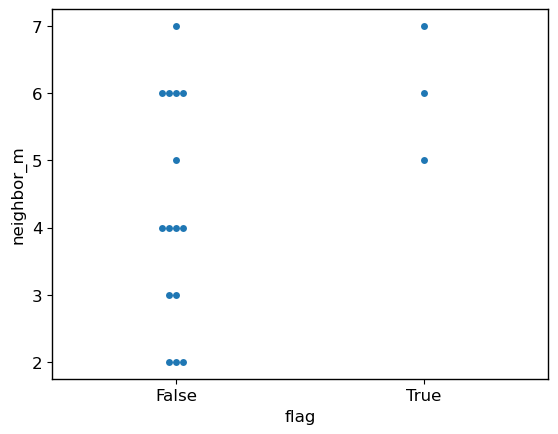

In [831]:
data_1 = data[data.image==img[20]]
sns.swarmplot(data=data_1[data_1.ref_type=='p'], x="flag", y="neighbor_m",)
plt.show()

In [667]:
all_obj = pd.concat([all_time['start_m'],all_time['start_p']])
# all_obj = all_time['-0']

In [833]:
all_obj.keys()

Index(['p', 'm', 'p_type', 'm_type', 'p_start', 'p_area', 'p_axis',
       'p_eccentricity', 'm_start', 'm_area', 'm_axis', 'm_eccentricity',
       'neighbor_m', 'neighbor_p', 'p_angle', 'm_angle', 'p_angle_index',
       'm_angle_index', 'center_dist', 'nearest_dist', 'flag', 'time_measure',
       'time_0', 'ref', 'image', 'ref_type'],
      dtype='object')

In [1119]:
data_table = pd.concat([all_time['start_m'],all_time['start_p']])
# data_table = all_obj = all_time['-0']
data_table = data_table.reset_index()
names = all_obj.image.unique()
for i in range(0, len(names)):
    group = data_table[data_table.image == names[i]]
    center_order = (group.center_dist - group.center_dist.min()) / (group.center_dist.max() - group.center_dist.min())
    near_order = (group.nearest_dist - group.nearest_dist.min()) / (group.nearest_dist.max() - group.nearest_dist.min())
    
    k = find_key(names[i])
    if k is None:
        v = {'reso': 0.12960, 'bin': 2}
    else:
        v = k[1]
    data_table.loc[group.index, 'nearest_dist'] = data_table.loc[group.index, 'nearest_dist']*v['reso']*v['bin']
    data_table.loc[group.index, 'center_dist'] = data_table.loc[group.index, 'center_dist']*v['reso']*v['bin']
    data_table.loc[group.index, 'm_area'] = data_table.loc[group.index, 'm_area']*(v['reso']**2)*(v['bin']**2)
    data_table.loc[group.index, 'p_area'] = data_table.loc[group.index, 'p_area']*(v['reso']**2)*(v['bin']**2)
    data_table.loc[group.index, 'p_area'] = data_table.loc[group.index, 'p_area']*(v['reso']**2)*(v['bin']**2)
    data_table.loc[group.index, 'p_axis'] = data_table.loc[group.index, 'p_axis']*v['reso']*v['bin']
    data_table.loc[group.index, 'm_axis'] = data_table.loc[group.index, 'm_axis']*v['reso']*v['bin']
    
    data_table.loc[group.index, 'center_norm'] = center_order
    data_table.loc[group.index, 'center_order'] = (np.argsort(center_order)+1) / len(center_order)
    data_table.loc[group.index, 'near_norm'] = near_order
    data_table.loc[group.index, 'near_order'] = (np.argsort(near_order)+1) / len(near_order)

# data_table = data_table.drop_duplicates(subset = ['p','m','time_0', 'image'])

In [1120]:
colums = ["p", "m", "p_start", 'p_area', 'p_axis', 'p_eccentricity',
          "m_start", 'm_area', 'm_axis', 'm_eccentricity',
          "p_angle", "p_angle_index", "m_angle", "m_angle_index",
          "nearest_dist", "center_dist", "near_norm", "center_norm", "center_order", "near_order",
         "neighbor_m", "neighbor_p", "time_measure", "image", "flag"]

In [1121]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = data_table[colums]
data = data.dropna()
X = data.iloc[:,2:-3]
Y = data["flag"]*1

In [1122]:
scaler = preprocessing.StandardScaler().fit(X)
StandardScaler()
X_scaled = scaler.transform(X)

<Axes: >

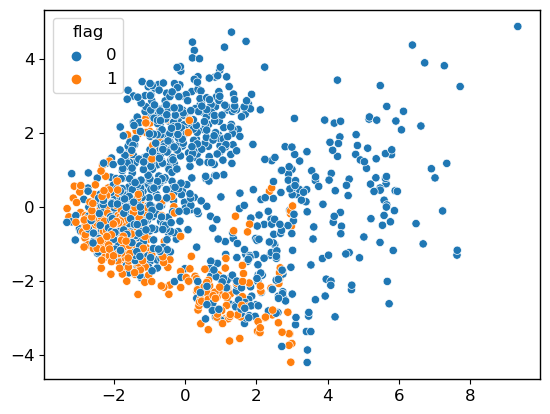

In [1123]:
pca= PCA(n_components=2, svd_solver='full')
fit = pca.fit(X_scaled)
X_trans = fit.fit_transform(X_scaled)
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],hue=Y)

In [1124]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
svc = clf.fit(X_scaled, Y)
pred = svc.predict(X_scaled)
score = np.max(svc.predict_proba(X_scaled),axis=1)

/tmp/ipykernel_3937/2822316348.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=Y,ax=axs[0])
/tmp/ipykernel_3937/2822316348.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=pred, ax=axs[1])


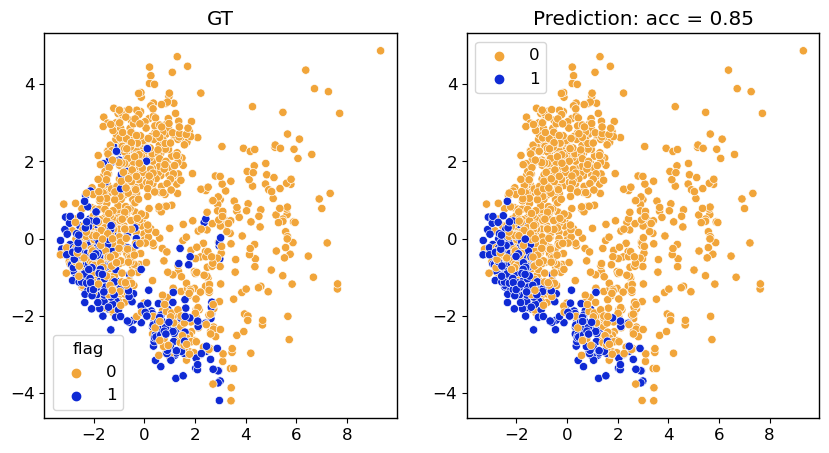

In [1126]:
fig,axs = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=Y,ax=axs[0])
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1],palette=colors_gaudi, hue=pred, ax=axs[1])
axs[0].set_title("GT")
axs[1].set_title(f"Prediction: acc = {accuracy_score(Y, pred):0.3}")
# plt.savefig("./figs/prediction.svg")
plt.show()

In [1134]:
i = 39
index = data[data.image == img[i]].index
print(img[i])
pred_data = data.loc[index, ["p","m","flag"]]
pred_data["pred"] = pred[index]
pred_data["score"] = score[index]
pred_data.dropna()

20220802_YAV2104xYAV2105_001_10_R3D_REF_rigid_004002.tif


p   m   flag  pred     score
200  17  27  False     0  0.942481
201  24  27  False     0  0.901255
202  30  27  False     0  0.934845
203  31  27  False     0  0.947621
204  32  27  False     0  0.867555
726  48  27   True     0  0.933070
727  17  27  False     0  0.936886
728  24  27  False     0  0.869614
729  30  27  False     1  0.658099
730  31  27  False     0  0.824803
731  32  27  False     0  0.920080
732  48  27   True     0  0.882356
733  49  27  False     0  0.925166

/tmp/ipykernel_3937/3197095358.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=Y[index],ax=axs[0])
/tmp/ipykernel_3937/3197095358.py:3: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=pred[index], ax=axs[1])


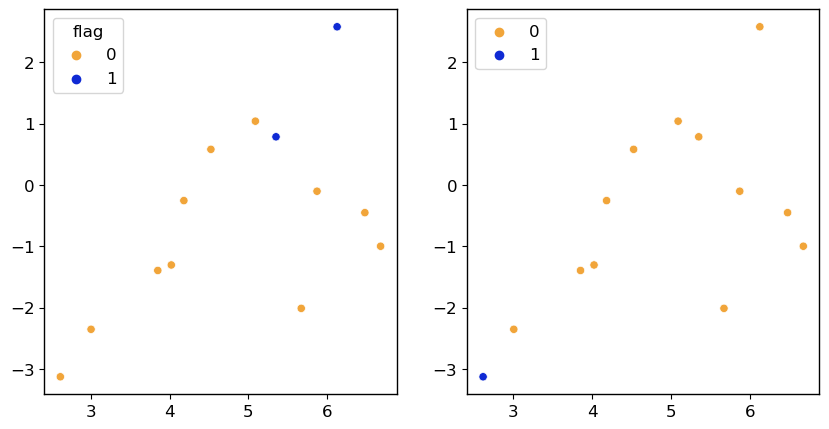

In [1135]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=Y[index],ax=axs[0])
sns.scatterplot(x=X_trans[index,0], y=X_trans[index,1],palette=colors_gaudi, hue=pred[index], ax=axs[1])
plt.show()

0.8501152959262106

In [47]:
def norm_angle_index(data):
    data = data%30
    data[data>15] = 30-data[data>15]
    data = data/15
    return data

In [50]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


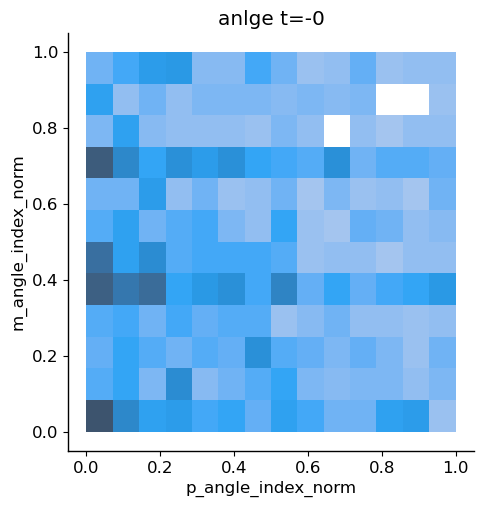

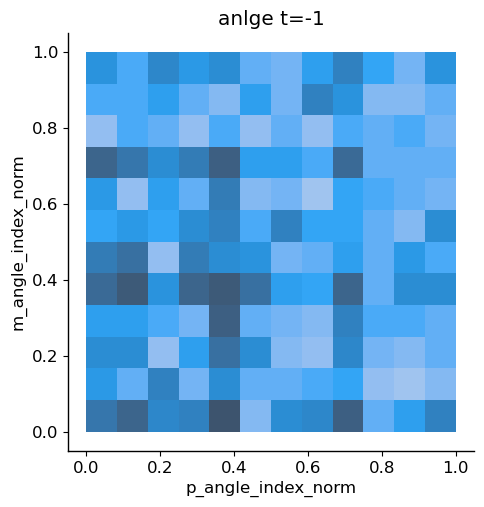

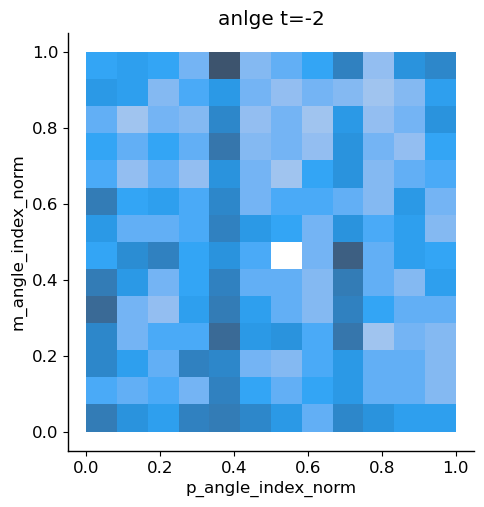

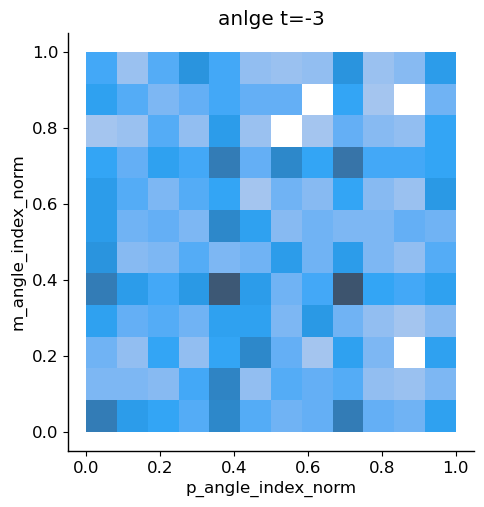

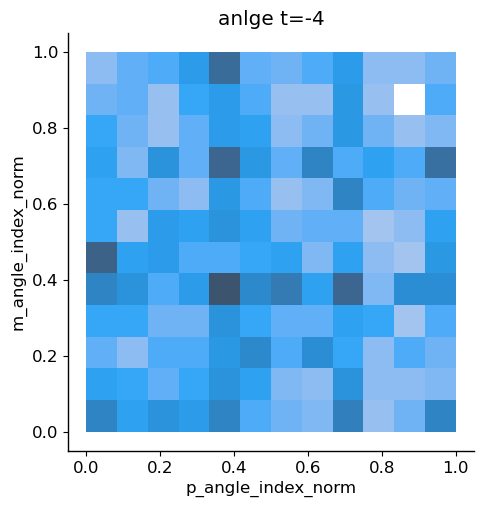

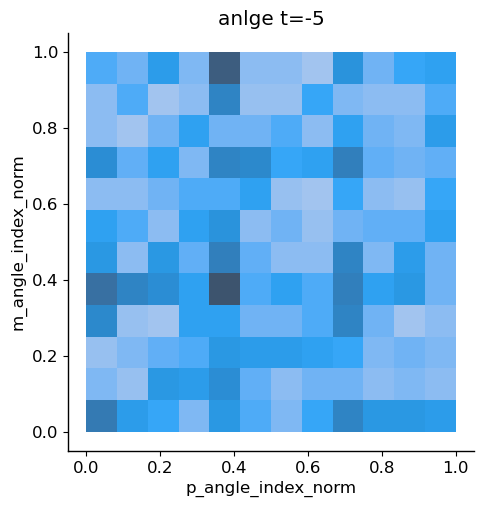

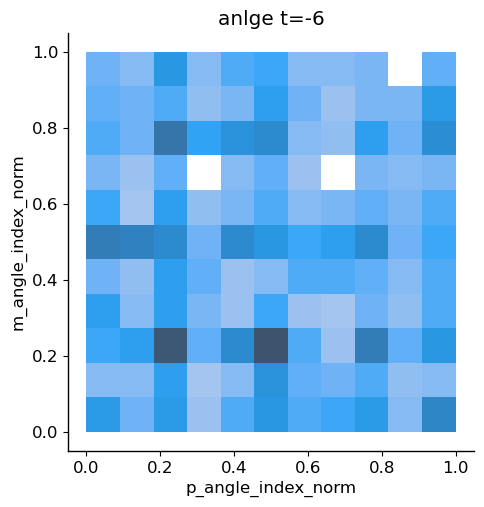

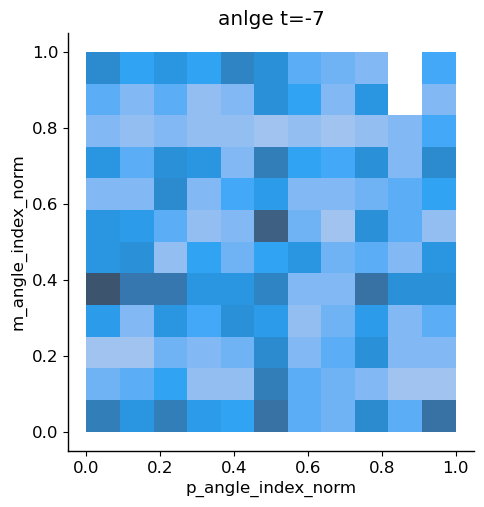

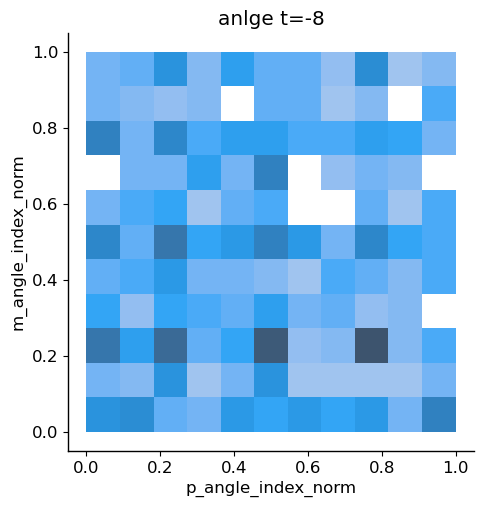

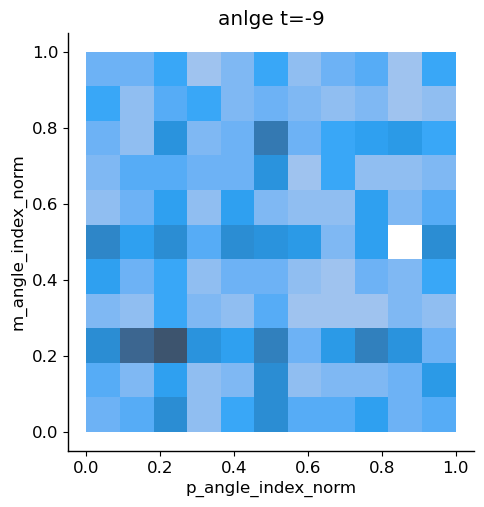

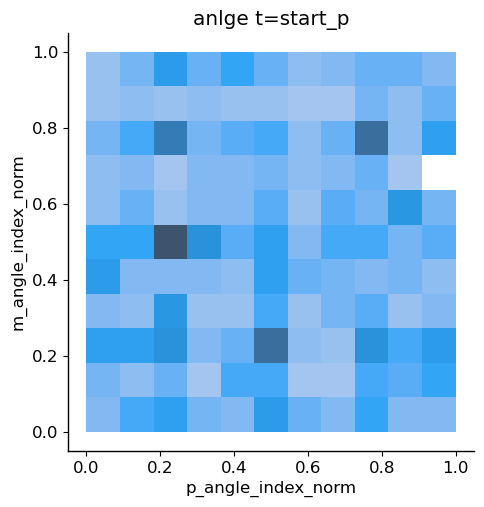

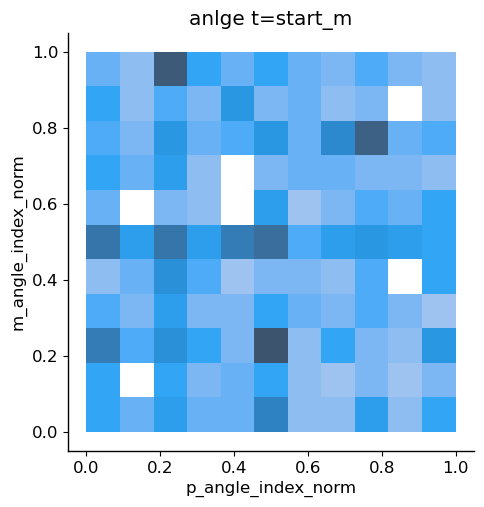

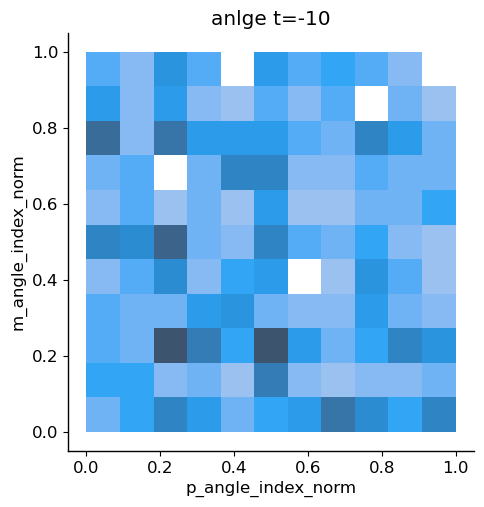

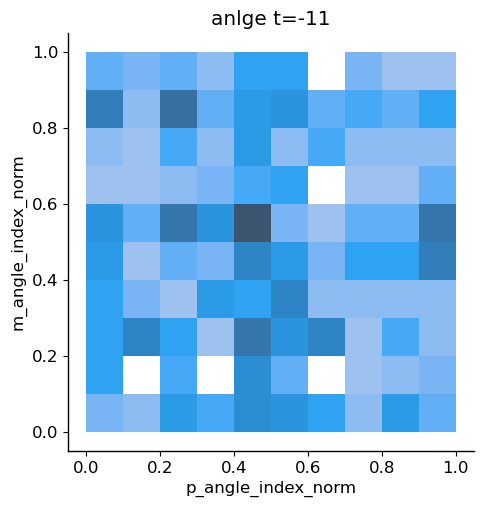

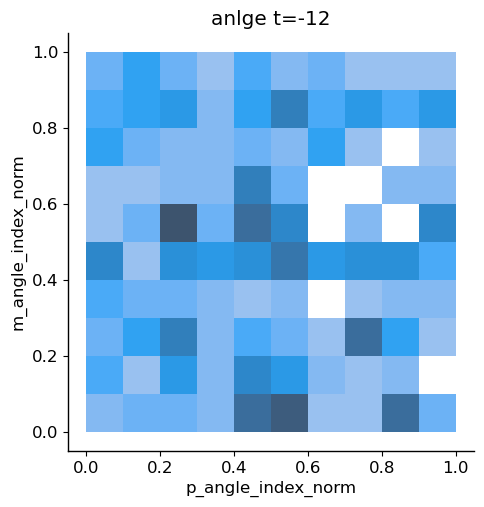

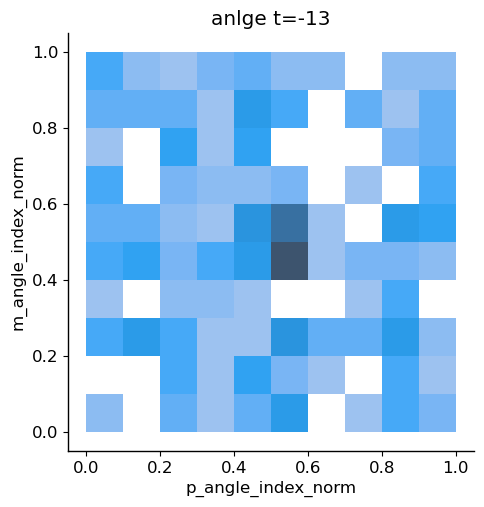

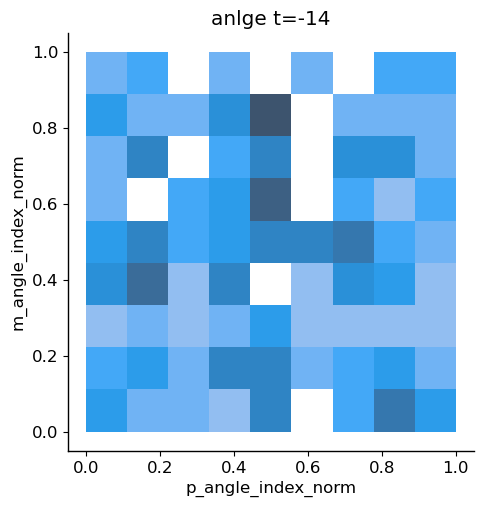

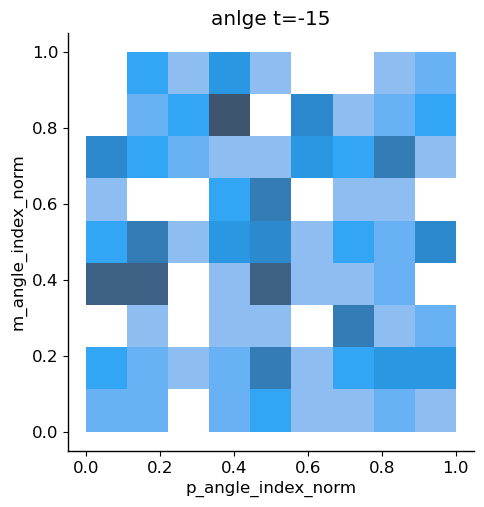

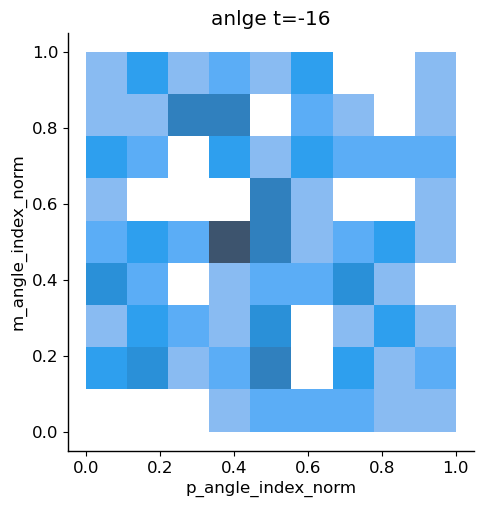

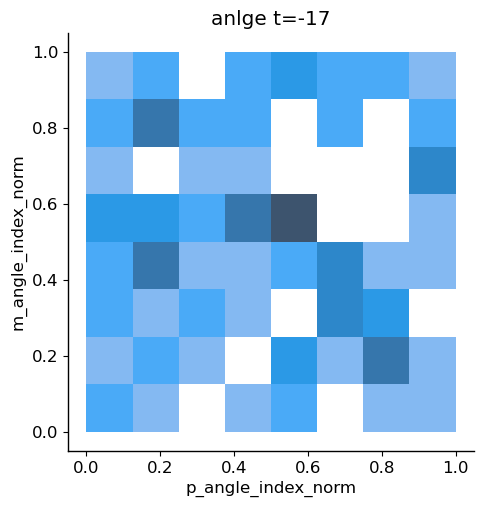

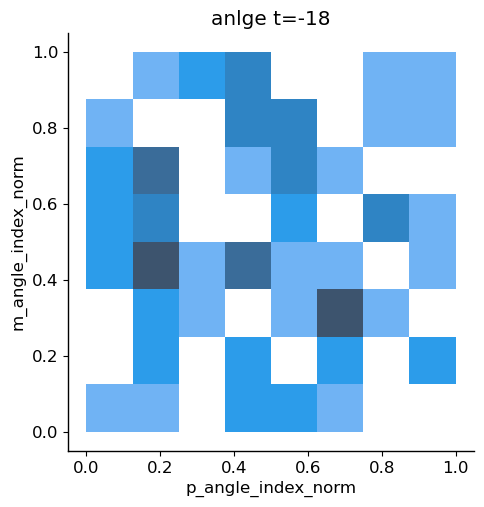

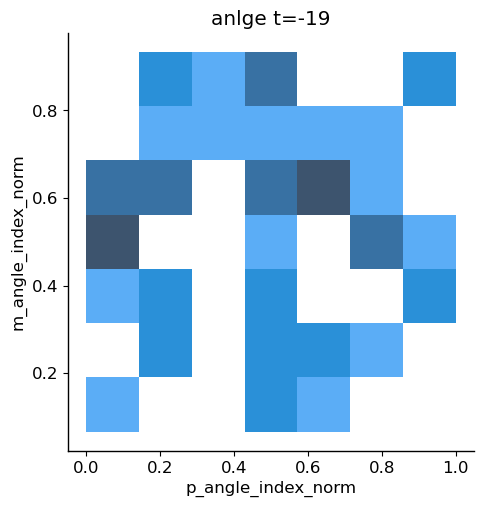

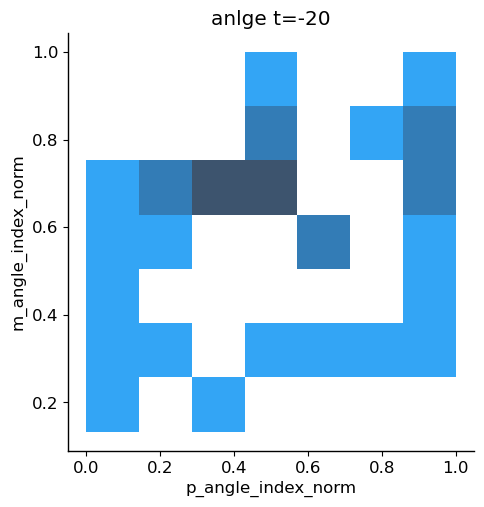

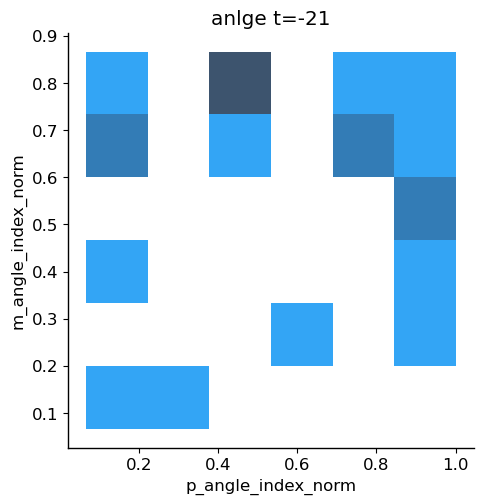

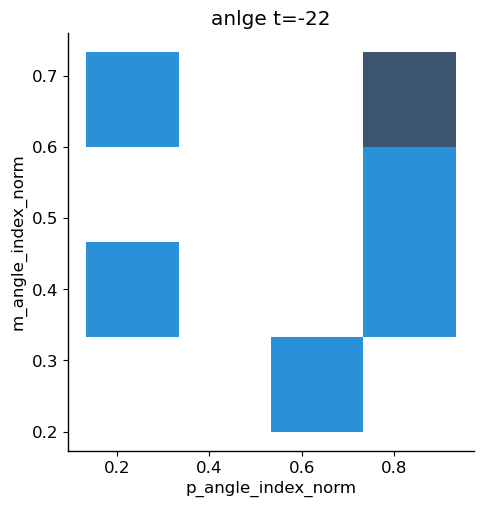

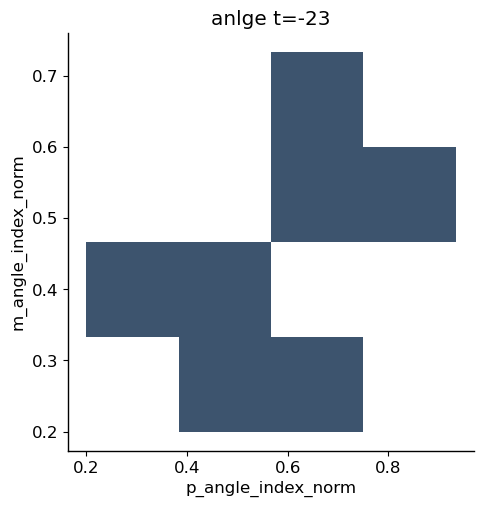

In [51]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
    # all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    # all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
    
    sns.displot(x=all_obj.p_angle_index_norm, y=all_obj.m_angle_index_norm)
    plt.title(f"anlge t={k}")
    plt.savefig('index_pairs_'+k+'.svg')

/home/wd/miniconda3/envs/deepyeast/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


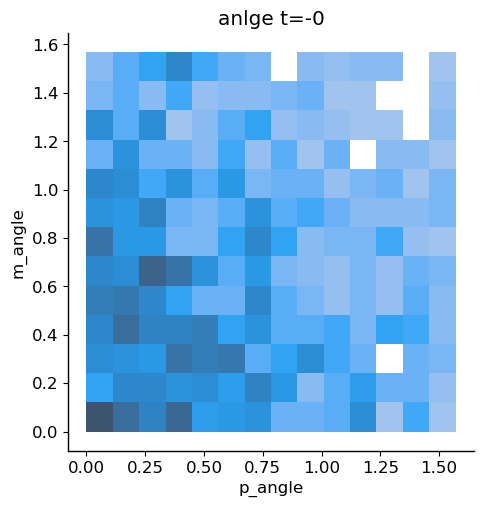

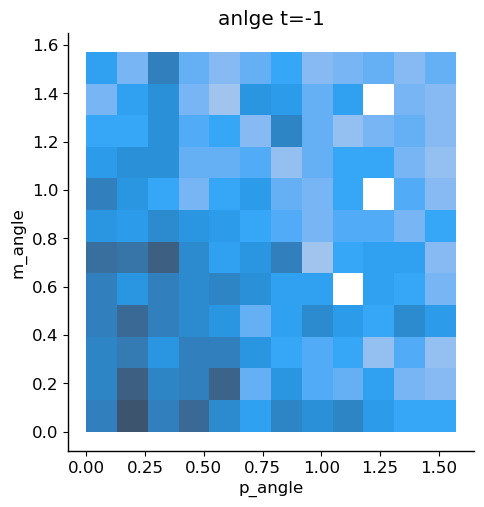

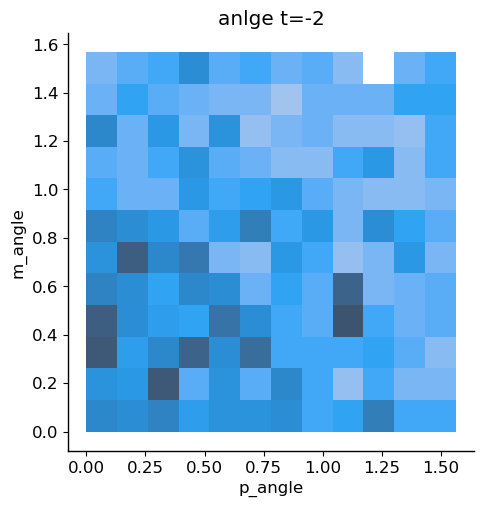

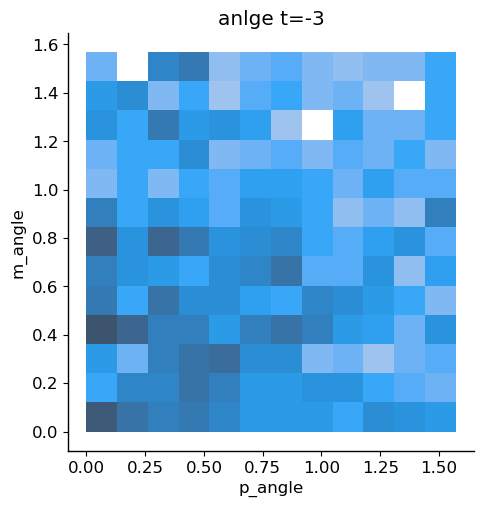

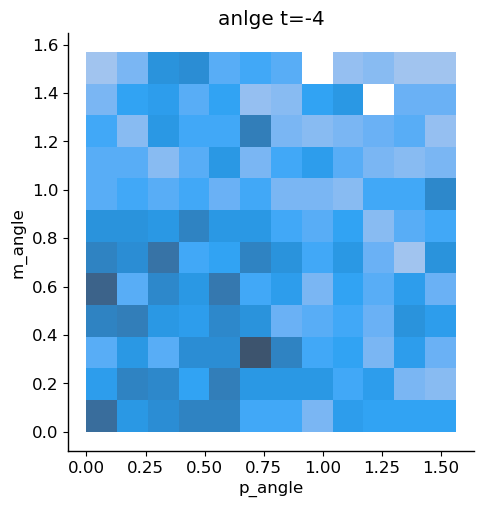

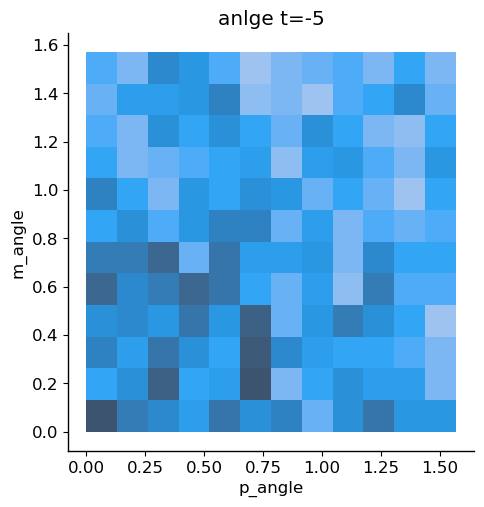

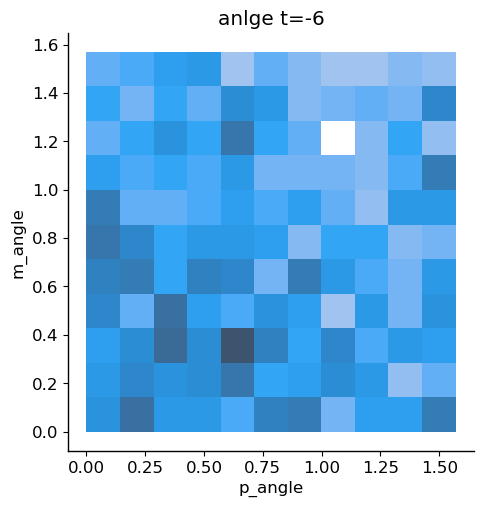

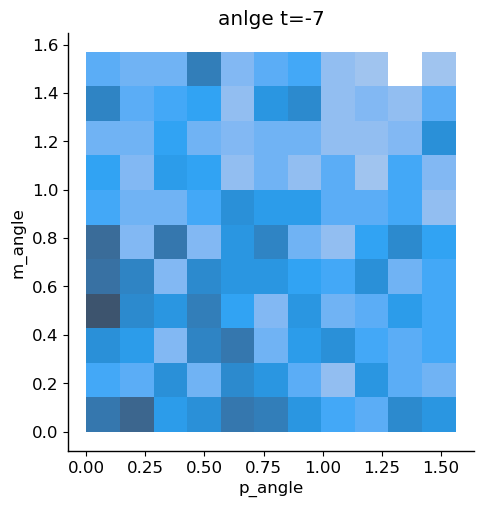

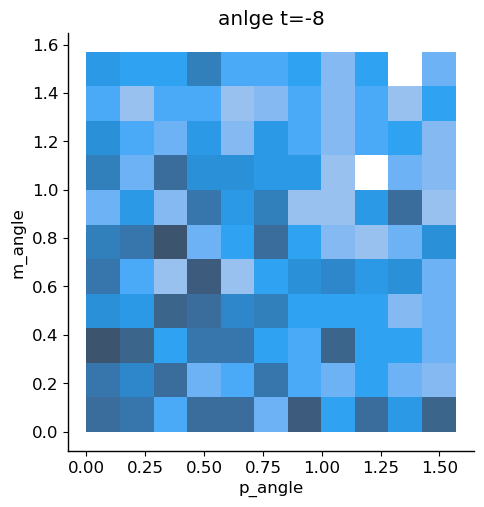

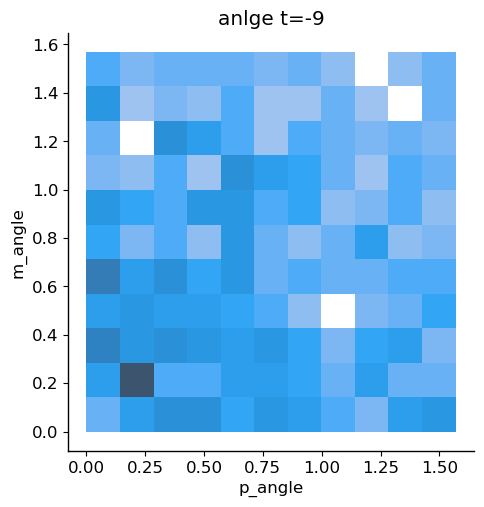

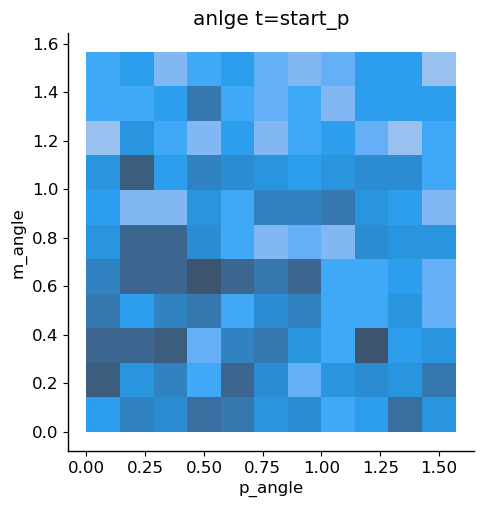

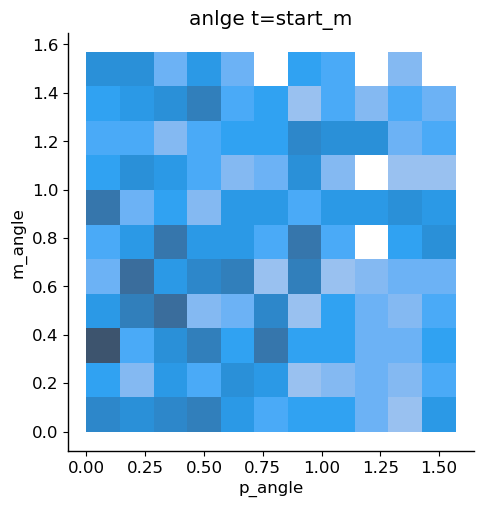

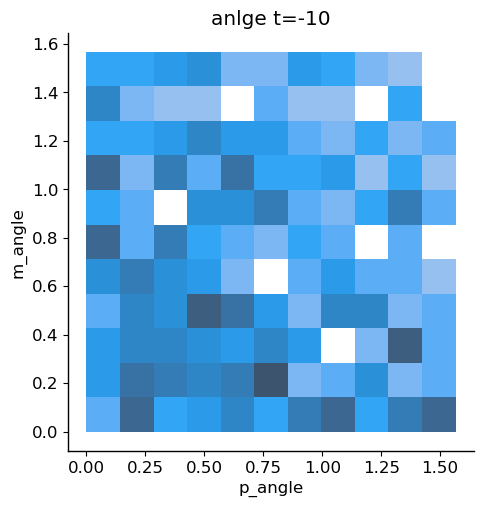

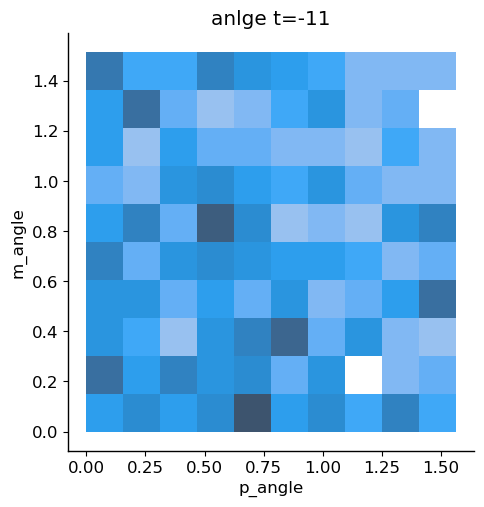

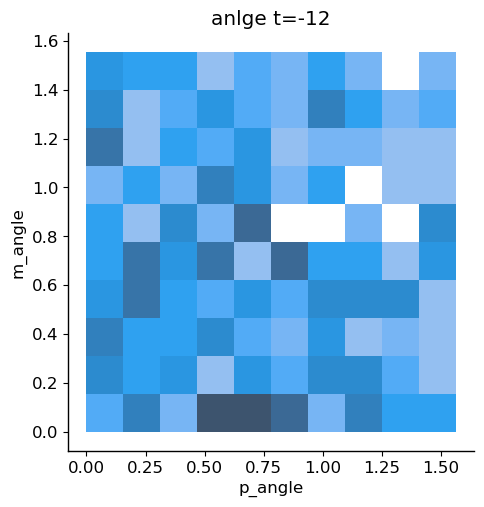

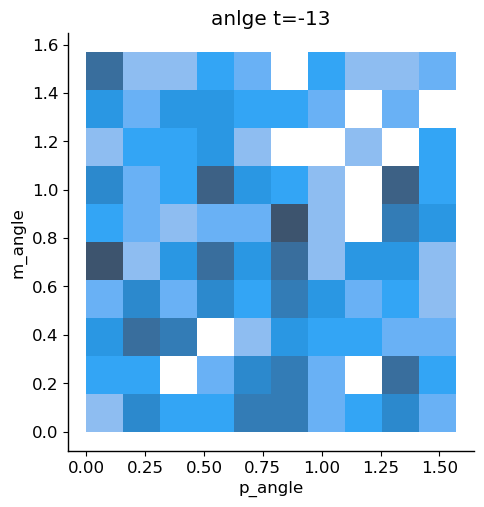

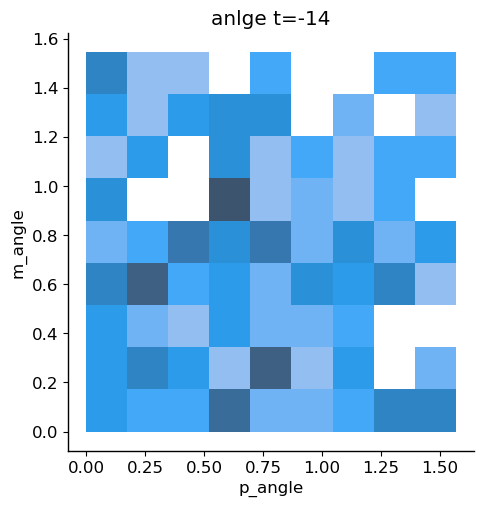

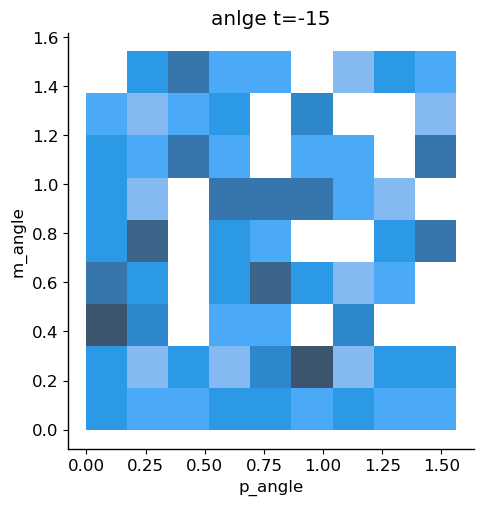

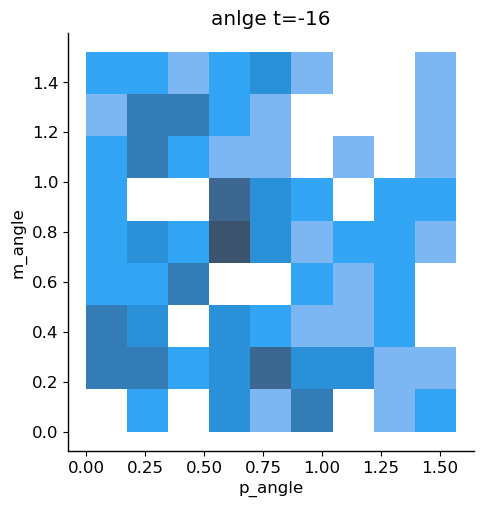

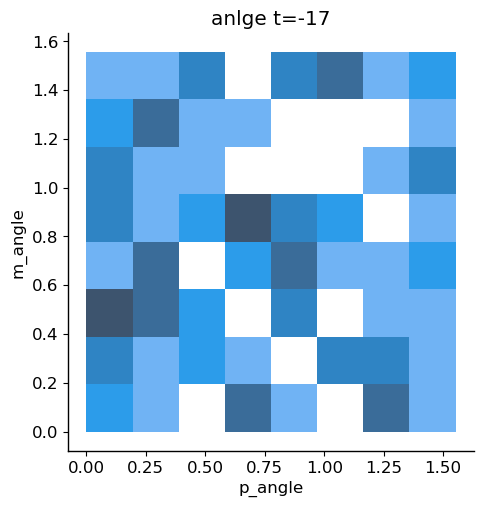

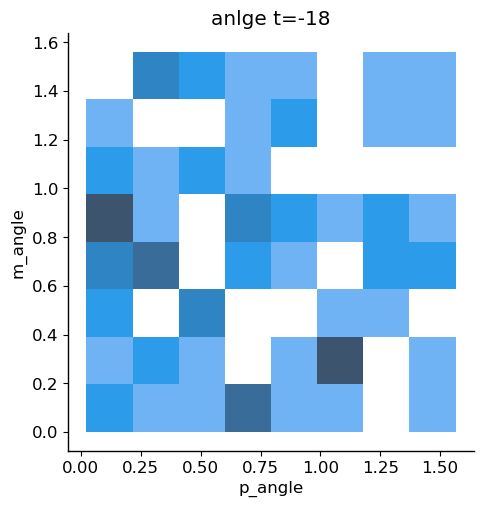

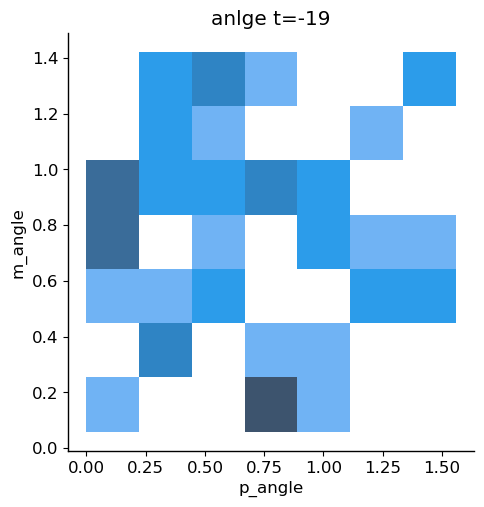

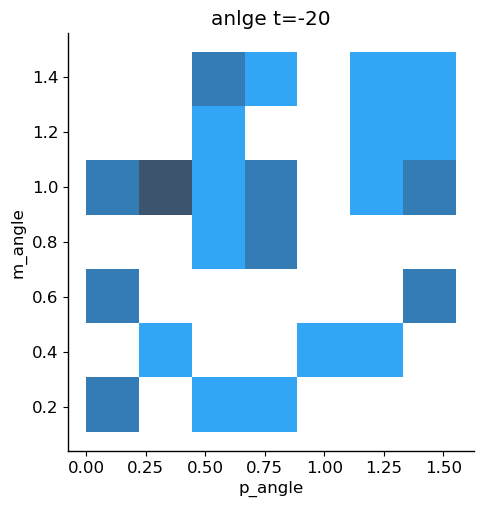

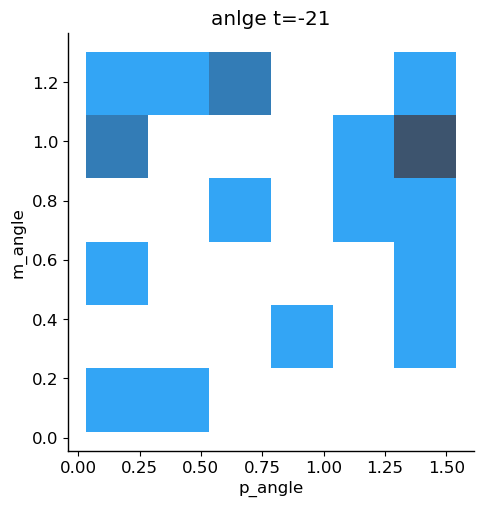

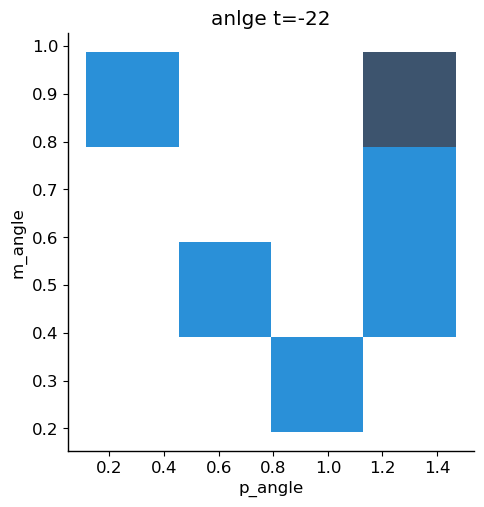

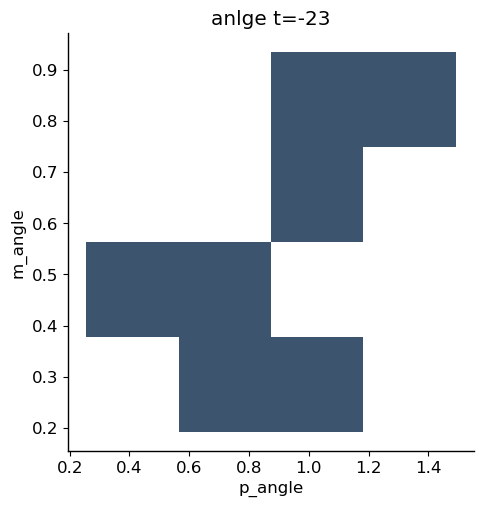

In [45]:
for k in all_time.keys():
    all_obj = all_time[k]
    all_obj = all_obj.reset_index(drop=True)
    
    # all_obj["p_angle_index_norm"] = norm_angle_index(all_obj["p_angle_index"])
    # all_obj["m_angle_index_norm"] = norm_angle_index(all_obj["m_angle_index"])
    
    sns.displot(x=all_obj.p_angle, y=all_obj.m_angle)
    plt.title(f"anlge t={k}")
    plt.savefig('angle_pairs_'+k+'.svg')

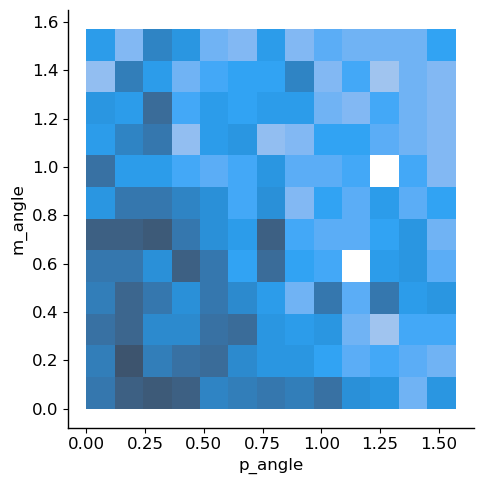

In [60]:
sns.jointplot(angles, x='p_angle', y='m_angle', hue='flag')

NameError: name 'angles' is not defined

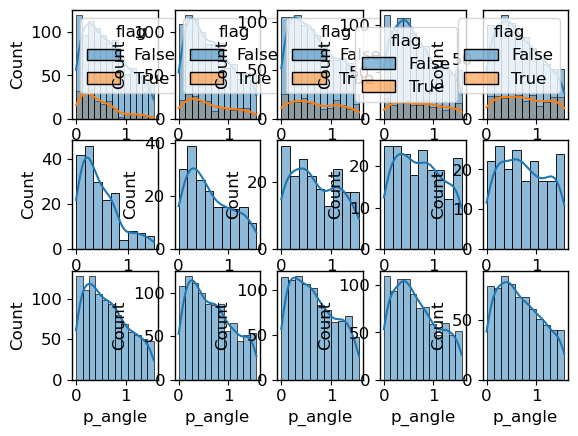

In [130]:
fig, axs = plt.subplots(3, len(all_data))

for i,k in enumerate(all_data.keys()):
    data = all_data[k]
    sns.histplot(data, x = 'p_angle', hue='flag', kde=True, ax=axs[0, i])
    sns.histplot(data[data.flag].p_angle, kde=True, ax=axs[1, i])
    sns.histplot(data[~data.flag].p_angle, kde=True, ax=axs[2, i])
    axs.set_title()

In [134]:
(all_data['end'].p_angle < np.pi/6).sum() / all_data['end'].shape[0]

0.48894348894348894

/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/wlli/miniconda3/envs/yeast/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


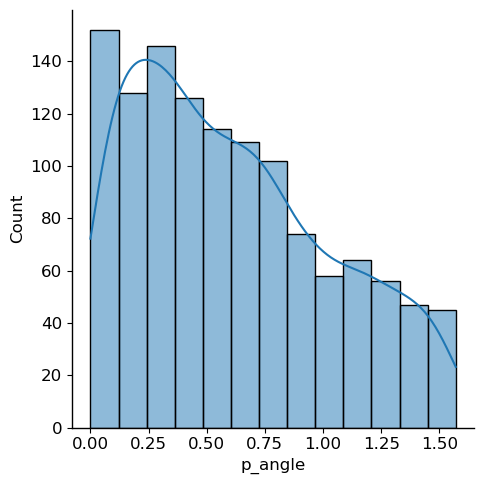

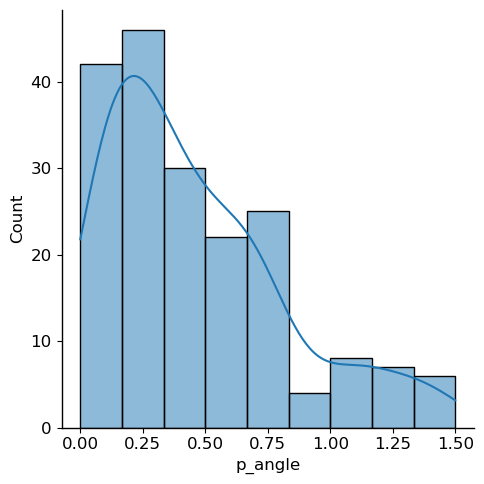

In [121]:
sns.displot(data.p_angle, kde=True)
sns.displot(data[data.flag].p_angle, kde=True)

In [77]:
data = pd.read_csv("./csv/dynamic_patch_neiber_distance_index_all_time_point.csv", index_col=0)

In [78]:
data.loc[data['Deviation']>30, 'Deviation'] = 60 - data[data['Deviation']>30].Deviation

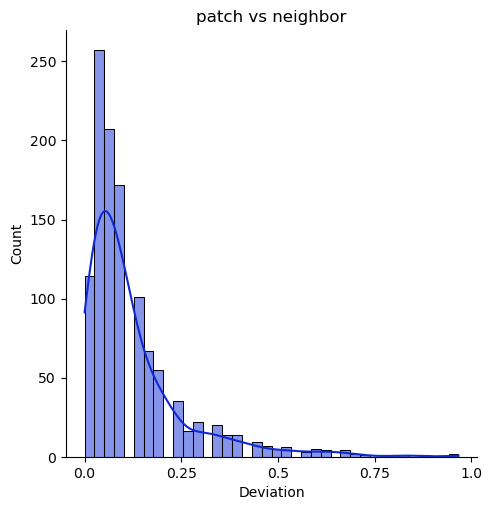

In [90]:
sns.displot(data[data.timepoint==0]['Deviation'], kde=True, color=colors_gaudi[1])
x_range = np.linspace(0,30,5)
x_range_label = x_range/30
x_range_label = [f"{i:0.2}" for i in x_range_label]
plt.xticks(x_range, x_range_label)
plt.title("patch vs neighbor")
plt.savefig("./figs/patch_vs_neighbor.svg")
plt.show()

In [80]:
colors_list = [(202, 58, 32),(241, 165, 58), (249, 222, 75),(247, 240, 220), (135, 235, 233),(151, 200, 233),]


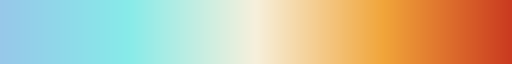

In [81]:
colors_list = [(151, 200, 233), (135, 235, 233), (247, 240, 220), (241, 165, 58),(202, 58, 32)]
colors_gaudi_list=[]
for a,b,c in colors_list:
    colors_gaudi_list.append((a/255,b/255,c/255))
COLOR_Gaudi_line = mpl.colors.LinearSegmentedColormap.from_list("", colors_gaudi_list)
COLOR_Gaudi_line

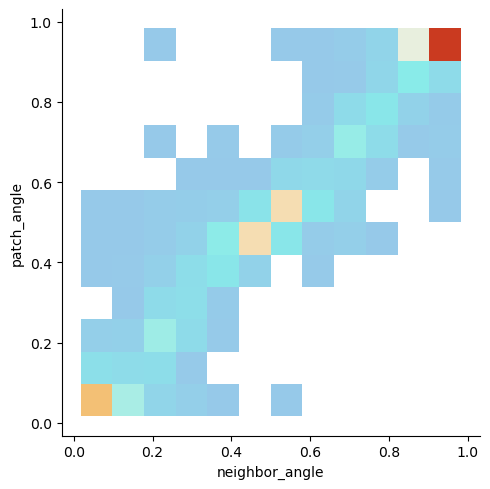

In [89]:
sns.displot(data[data.timepoint==0],x='neighbor_angle', y='patch_angle', cmap=COLOR_Gaudi_line)
# plt.savefig("./figs/patch_vs_neighbor_heatmap.svg")